# Inicializando

## Limpando diretório e adquirindo dados e funções do git. (versão antiga)

In [ ]:
# Removing sample_data
#!rm -rf sample_data

# Cloning the repo
#!git clone https://github.com/lucapcf/BAH_bootcamp

# Moving files from the repo folder to the root directory
#!mv BAH_bootcamp/* .

# Removing the original repo folder
#!rm -rf BAH_bootcamp

Cloning into 'BAH_bootcamp'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 84 (delta 22), reused 84 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 326.57 KiB | 1.71 MiB/s, done.
Resolving deltas: 100% (22/22), done.
mv: cannot overwrite './pre_processed_data': Directory not empty
mv: cannot overwrite './raw_data': Directory not empty
mv: cannot overwrite './removed_data': Directory not empty


## Procurando licensa

In [1]:
from pathlib import Path
from IPython.display import display, Javascript

# Define the file path
file_path = Path('gurobi.lic')

# Check if the file exists
if not file_path.exists():
    # Trigger a JavaScript alert in the browser
    display(Javascript(f'alert("Erro: A licensa gurobi ({file_path}) não existe na raiz.")'))
else:
    print(f"A licensa '{file_path}' foi encontrada.")

<IPython.core.display.Javascript object>

## Esse passo pode ser pulado, visto que é muito demorado e os arquivos pré-processados já existem. Para testes usar "<example>_sample".

In [ ]:
# from pre_processing import extract_symbols, check_integrity
# import datetime as dt

# filepath = "raw_data/NASDAQ_sample.csv"
# exch = 'nasdaq'
# start_date = dt.datetime(2019, 1, 1)
# end_date = dt.datetime(2020, 1, 1)

# filepath1 = extract_symbols(filepath, exch)
# check_integrity(filepath1, start_date, end_date)

# Funções e constantes gerais

## Funções

In [ ]:
def obter_dados(tickers, start_date, end_date):
    """Obtém dados históricos de preços ajustados."""
    dados = pd.DataFrame()
    failed_tickers = []
    i = 0

    for stock in tickers:
        i += 1
        print(f"Downloading data from {stock}... ({i}/{len(tickers)})")
        stock_data = yf.download(stock, start=start_date, end=end_date)[["Adj Close"]]
        if stock_data.empty:
            print(f"No data found for {stock}, skipping...")
            failed_tickers.append(stock)
            continue
        else:
            dados = pd.concat([dados, stock_data], axis=1)

    # Identify columns with NaN values
    columns_with_nan = dados.columns[dados.isna().any()].tolist()
    dados_dropped = dados[columns_with_nan].columns.get_level_values(1).tolist()

    # Remove stocks with NaN values from original DataFrame
    dados_clean = dados.drop(columns=columns_with_nan)
    cleaned_symbols = dados_clean.columns.get_level_values(1).tolist()

    if dados_dropped:
        print('Not available in the period requested:', dados_dropped)
    else:
        print('Data valid.')
    if failed_tickers:
        print('Failed download:', failed_tickers)
    else:
        print('Downloads successful.')

    return dados_clean['Adj Close']

def calcular_retorno_acumulado_ativo(retornos):
    """Calcula o retorno acumulado de um ativo."""
    return (1 + retornos).cumprod() - 1

## Imports

In [ ]:
!pip install squarify
!pip install gurobipy
from IPython.display import clear_output
import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from sklearn.preprocessing import MinMaxScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 56.5 MB/s eta 0:00:00


# Analisando os Datasets

## Funções e constantes

In [ ]:
def escolhe_pesos(tickers, k):
    """
    Seleciona k tickers aleatórios e atribui pesos normalizados.
    """
    selected_tickers = np.random.choice(tickers, k, replace=False)
    raw_weights = np.random.rand(k)
    normalized_weights = raw_weights / raw_weights.sum()

    ticker_weights = {}
    for symbol, weight in zip(selected_tickers, normalized_weights):
        ticker_weights[symbol] = weight

    return ticker_weights

## S&P100

### Inicializando

In [ ]:
filepath_sp100 = 'pre_processed_data/bkp_pre_processed_parsed_SP100.csv'
start_date = dt.datetime(2022, 10, 31)
end_date = dt.datetime(2024, 10, 31)
tickers = []

with open(filepath_sp100, 'r') as file:
  for line in file:
    tickers.extend(line.strip().split(','))

percentages_symbols = pd.read_csv('pre_processed_data/sp100_percentages_symbols.csv', encoding='latin-1')

# Obtendo dados dos ativos
dados_nasdaq_nyse = obter_dados(tickers, start_date, end_date)
sp100_dados = obter_dados(['^OEX'], start_date, end_date)
sp500_dados = obter_dados(['^GSPC'], start_date, end_date)

# Calculando retornos
retornos_nasdaq_nyse = dados_nasdaq_nyse.pct_change().dropna()
retornos_sp100 = sp100_dados.pct_change().dropna()
retornos_sp500 = sp500_dados.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Not available in the period requested: []
Failed download: []
Not available in the period requested: []
Failed download: []


[*********************100%***********************]  1 of 1 completed


Not available in the period requested: []
Failed download: []


### Composição do S&P 100

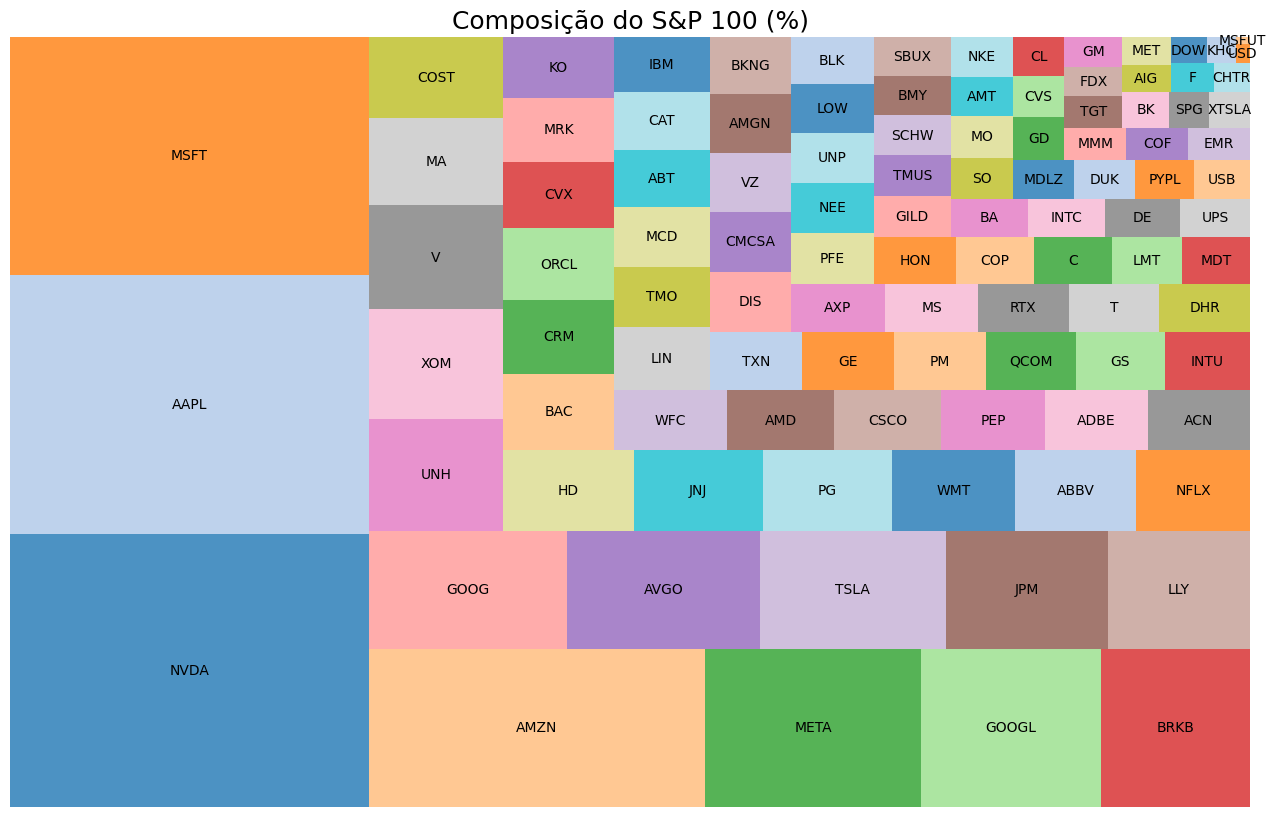

In [ ]:
import matplotlib.pyplot as plt
import squarify

percentages_symbols['Weight (%)'] = percentages_symbols['Weight (%)'].replace({',': ''}, regex=True).astype(float)

returns_percentages_symbols = percentages_symbols[percentages_symbols['Weight (%)'] > 0]

fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor("white")

squarify.plot(
    sizes=returns_percentages_symbols['Weight (%)'],
    label=returns_percentages_symbols['Ticker'],
    alpha=0.8,
    color=plt.cm.tab20.colors
)

plt.axis('off')
plt.title("Composição do S&P 100 (%)", fontsize=18)
plt.show()

### Heatmap

DatetimeIndex(['2022-11-01 00:00:00+00:00', '2022-11-02 00:00:00+00:00',
               '2022-11-03 00:00:00+00:00', '2022-11-04 00:00:00+00:00',
               '2022-11-07 00:00:00+00:00', '2022-11-08 00:00:00+00:00',
               '2022-11-09 00:00:00+00:00', '2022-11-10 00:00:00+00:00',
               '2022-11-11 00:00:00+00:00', '2022-11-14 00:00:00+00:00',
               ...
               '2024-10-17 00:00:00+00:00', '2024-10-18 00:00:00+00:00',
               '2024-10-21 00:00:00+00:00', '2024-10-22 00:00:00+00:00',
               '2024-10-23 00:00:00+00:00', '2024-10-24 00:00:00+00:00',
               '2024-10-25 00:00:00+00:00', '2024-10-28 00:00:00+00:00',
               '2024-10-29 00:00:00+00:00', '2024-10-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=502, freq=None)


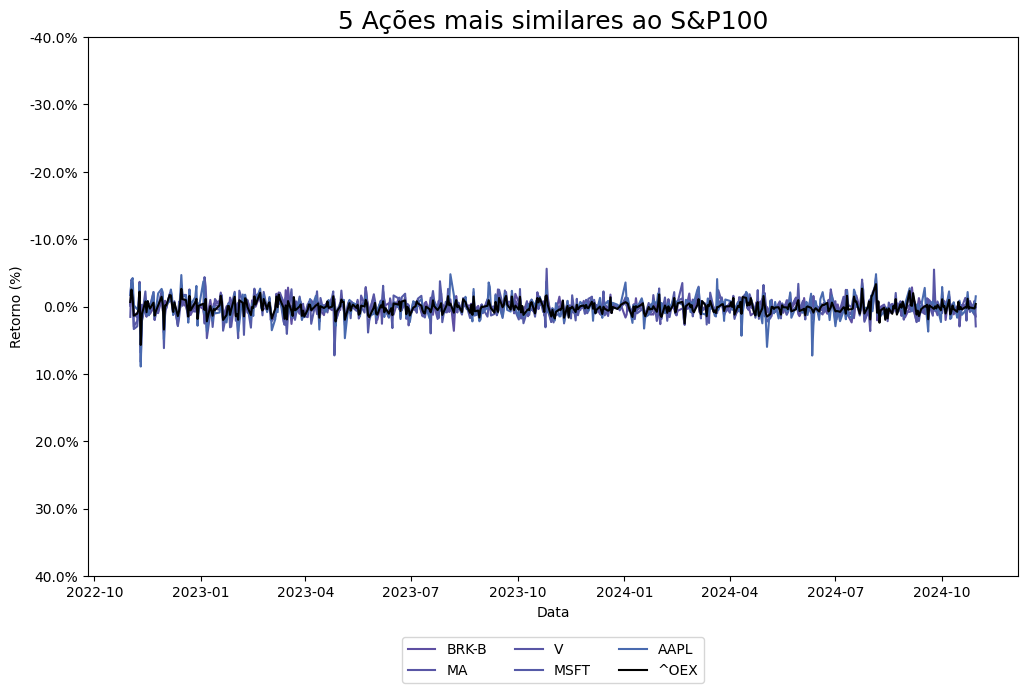

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular as diferenças e a intensidade
retorno_sp100_valor = retornos_sp100['^OEX']
diferencas = retornos_nasdaq_nyse.subtract(retorno_sp100_valor, axis=0).abs()

# Normalizar as diferenças para obter uma intensidade entre 0 e 1
max_val = diferencas.max().max()
intensidade = (1 - (diferencas / max_val)) if max_val != 0 else 0

# Calcular a intensidade média para cada ticker
intensidade_media = intensidade.mean()
intensidade_min = intensidade_media.min()
intensidade_max = intensidade_media.max()
intensidade_media = (intensidade_media - intensidade_min) / (intensidade_max - intensidade_min)

# Selecionar as 5 ações com maiores diferenças médias
top5_tickers = intensidade_media.nlargest(5).index

# Configurar o mapa de cores
cmap = plt.cm.Spectral
plt.figure(figsize=(12, 7))

print(retornos_nasdaq_nyse.index)

# Plotar cada uma das 5 ações selecionadas com base na intensidade de cor
for column in top5_tickers:
    ticker_intensity = intensidade_media[column]
    color = cmap(ticker_intensity)
    plt.plot(retornos_nasdaq_nyse.index, retornos_nasdaq_nyse[column], color=color, linewidth=1.5, label=column)

plt.plot(retornos_sp100.index, retornos_sp100, label='^OEX', color='black', linewidth=1.5)

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.1f}%'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title("5 Ações mais similares ao S&P100", fontsize=18)
plt.ylim(0.40, -0.40)
plt.show()

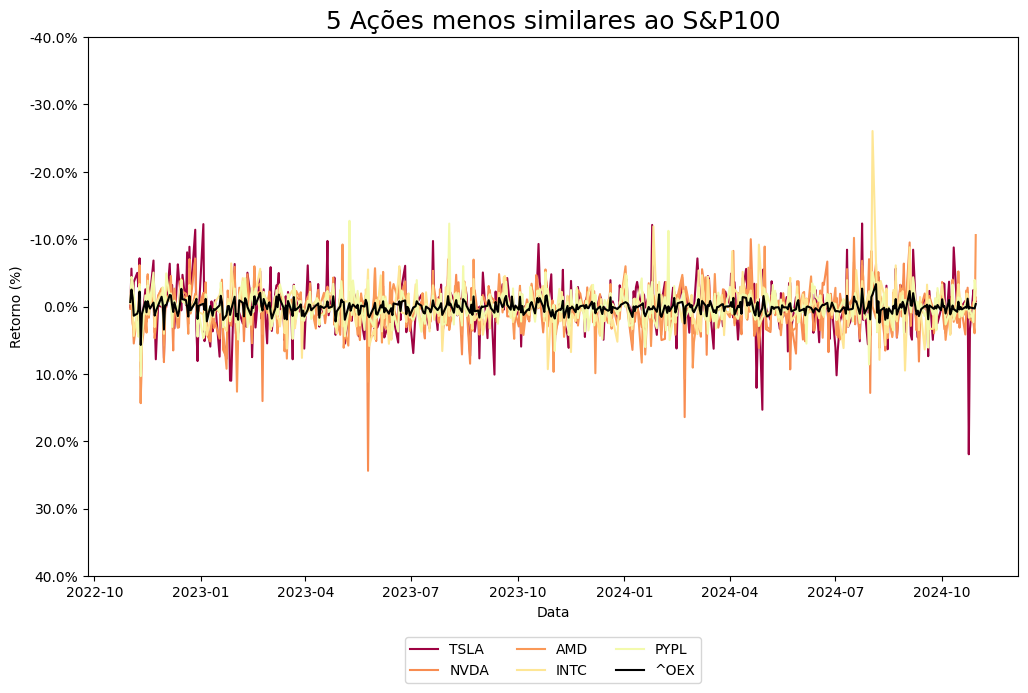

In [ ]:
# Calcular as diferenças e a intensidade
retorno_sp100_valor = retornos_sp100['^OEX']
diferencas = retornos_nasdaq_nyse.subtract(retorno_sp100_valor, axis=0).abs()

# Normalizar as diferenças para obter uma intensidade entre 0 e 1
max_val = diferencas.max().max()
intensidade = (1 - (diferencas / max_val)) if max_val != 0 else 0

# Calcular a intensidade média para cada ticker
intensidade_media = intensidade.mean()
intensidade_min = intensidade_media.min()
intensidade_max = intensidade_media.max()
intensidade_media = (intensidade_media - intensidade_min) / (intensidade_max - intensidade_min)

# Selecionar as 5 ações com maiores diferenças médias
top5_tickers = intensidade_media.nsmallest(5).index

# Configurar o mapa de cores
cmap = plt.cm.Spectral
plt.figure(figsize=(12, 7))

# Plotar cada uma das 5 ações selecionadas com base na intensidade de cor
for column in top5_tickers:
    ticker_intensity = intensidade_media[column]
    color = cmap(ticker_intensity)
    plt.plot(retornos_nasdaq_nyse.index, retornos_nasdaq_nyse[column], color=color, linewidth=1.5, label=column)

# Plotar o índice OEX
plt.plot(retornos_sp100.index, retornos_sp100, label='^OEX', color='black', linewidth=1.5)

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.1f}%'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title("5 Ações menos similares ao S&P100", fontsize=18)
plt.ylim(0.40, -0.40)
plt.show()

#### 'Heatmap' com todas as ações

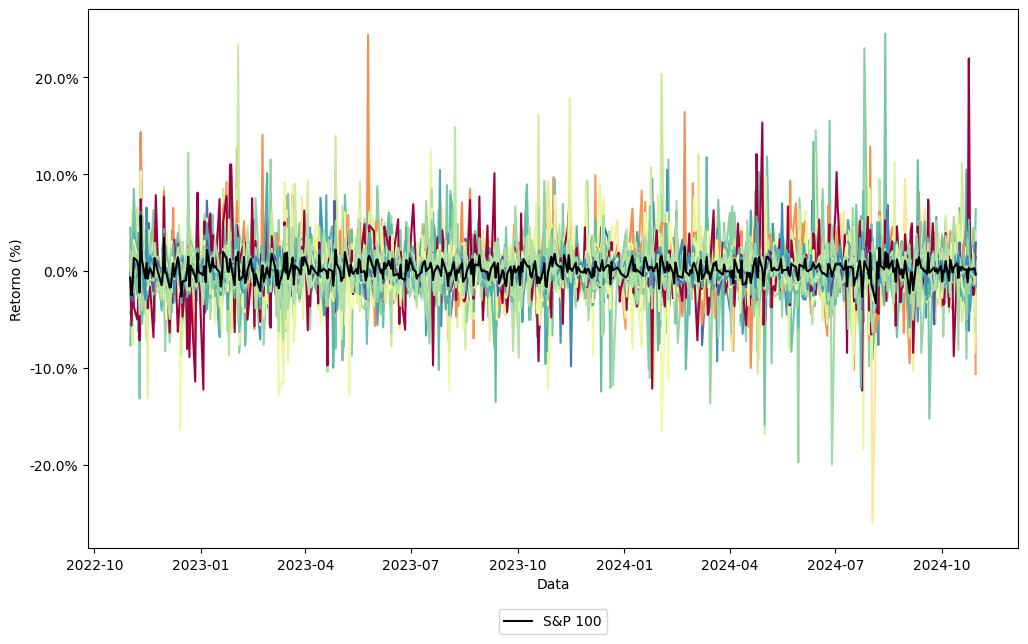

In [ ]:
retorno_sp100_valor = retornos_sp100['^OEX']
diferencas = retornos_nasdaq_nyse.subtract(retorno_sp100_valor, axis=0).abs()

# Normalizar as diferenças para obter uma intensidade entre 0 e 1
max_val = diferencas.max().max()
intensidade = (1 - (diferencas / max_val)) if max_val != 0 else 0

# Calcular a intensidade média para cada ticker
intensidade_media = intensidade.mean()
intensidade_min = intensidade_media.min()
intensidade_max = intensidade_media.max()
intensidade_media = (intensidade_media - intensidade_min) / (intensidade_max - intensidade_min)

cmap = plt.cm.Spectral
plt.figure(figsize=(12, 7))

# Plotar cada ação com uma cor baseada na diferenca
for column in intensidade_media.index:
    ticker_intensity = intensidade_media[column]
    color = cmap(ticker_intensity)

    plt.plot(retornos_nasdaq_nyse.index, retornos_nasdaq_nyse[column], color=color, linewidth=1.5)

plt.plot(retornos_sp100.index, retornos_sp100, label='S&P 100', color='black', linewidth=1.5)

plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.1f}%'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=12)
plt.show()

### Regressão linear

In [ ]:
import statsmodels.formula.api as sm

print(sp100_dados)
sp100_dados_renamed = sp100_dados.rename(columns={'^OEX': 'Preco_Ajustado'})
sp100_dados_renamed['Indice'] = sp100_dados_renamed.index.astype(int) / 10**9
modelo_sp100 = sm.ols('Preco_Ajustado ~ Indice', data=sp100_dados_renamed).fit()
media_regressao_sp100 = modelo_sp100.predict(sp100_dados_renamed).mean()

Ticker                            ^OEX
Date                                  
2022-10-31 00:00:00+00:00  1740.510010
2022-11-01 00:00:00+00:00  1728.729980
2022-11-02 00:00:00+00:00  1685.180054
2022-11-03 00:00:00+00:00  1662.400024
2022-11-04 00:00:00+00:00  1684.890015
...                                ...
2024-10-24 00:00:00+00:00  2806.389893
2024-10-25 00:00:00+00:00  2809.850098
2024-10-28 00:00:00+00:00  2816.830078
2024-10-29 00:00:00+00:00  2824.739990
2024-10-30 00:00:00+00:00  2813.929932

[503 rows x 1 columns]


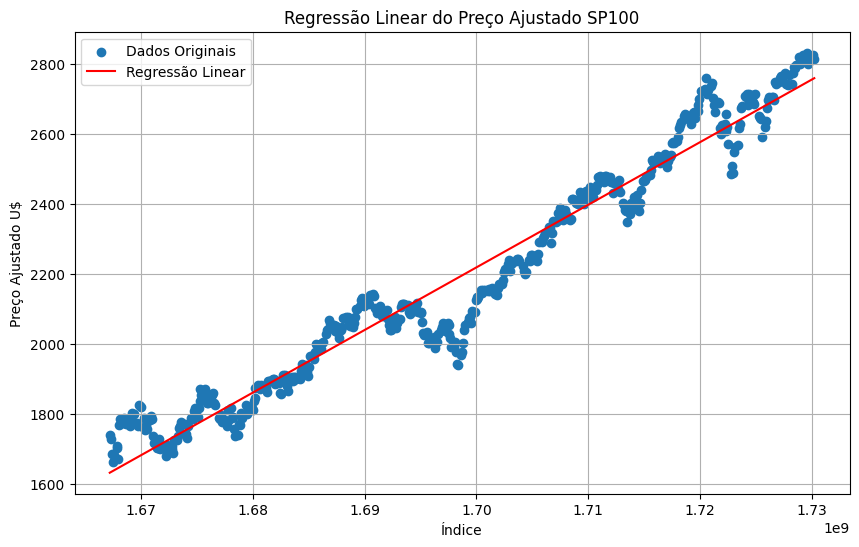

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(sp100_dados_renamed['Indice'], sp100_dados_renamed['Preco_Ajustado'], label='Dados Originais')
plt.plot(sp100_dados_renamed['Indice'], modelo_sp100.predict(sp100_dados_renamed), color='red', label='Regressão Linear')
plt.xlabel('Índice')
plt.ylabel('Preço Ajustado U$')
plt.title('Regressão Linear do Preço Ajustado SP100')
plt.legend()
plt.grid(True)
plt.show()

### Boxplot

<ipython-input-47-ff3a2fe45e85>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=sp100_dados_renamed['Preco_Ajustado'], palette='deep')


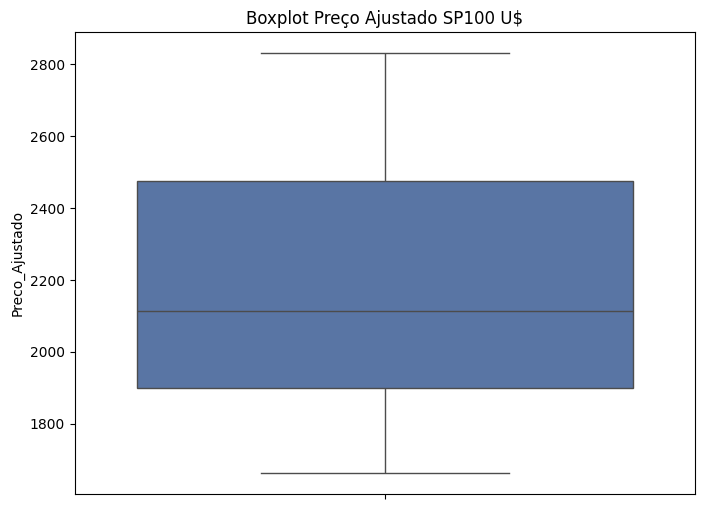

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ibov_boxplot = plt.figure(figsize=(8, 6))
sns.boxplot(y=sp100_dados_renamed['Preco_Ajustado'], palette='deep')
plt.title('Boxplot Preço Ajustado SP100 U$')
plt.show()

### Comparação S&P100 e ações

## IBOV

### Inicializando

In [ ]:
filepath = 'pre_processed_data/bkp_pre_processed_parsed_B3.csv'
start_date = dt.datetime(2022, 10, 31)
end_date = dt.datetime(2024, 10, 31)
tickers = []

with open(filepath, 'r') as file:
  for line in file:
    tickers.extend(line.strip().split(','))

ibov_percentages_symbols = pd.read_csv('pre_processed_data/IBOV_percentages_symbols.csv', encoding='latin-1')

# Obtendo dados dos ativos
dados_b3 = obter_dados(tickers, start_date, end_date)
dados_ibov = obter_dados(['^BVSP'], start_date, end_date)

# Calculando retornos
retornos_b3 = dados_b3.pct_change().dropna()
retornos_ibov = dados_ibov.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Not available in the period requested: []
Failed download: []
Not available in the period requested: []
Failed download: []


### Composição do IBOV

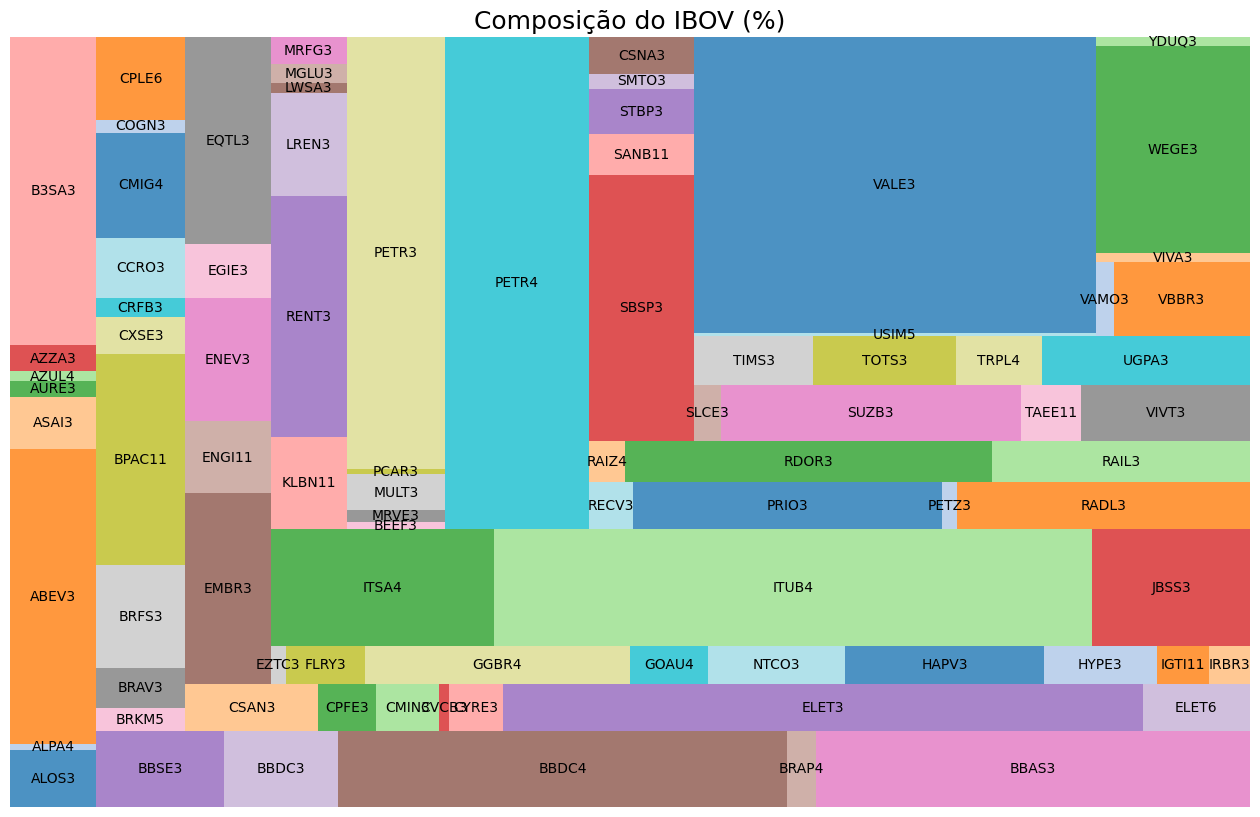

In [ ]:
ibov_percentages_symbols['Part. (%)'] = ibov_percentages_symbols['Part. (%)'].replace({',': ''}, regex=True).astype(float)

returns_ibov_percentages_symbols = ibov_percentages_symbols[ibov_percentages_symbols['Part. (%)'] > 0]

fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor("white")

squarify.plot(
    sizes=returns_ibov_percentages_symbols['Part. (%)'],
    label=returns_ibov_percentages_symbols['Codigo'],
    alpha=0.8,
    color=plt.cm.tab20.colors
)

plt.axis('off')
plt.title("Composição do IBOV (%)", fontsize=18)
plt.show()

### Heatmap

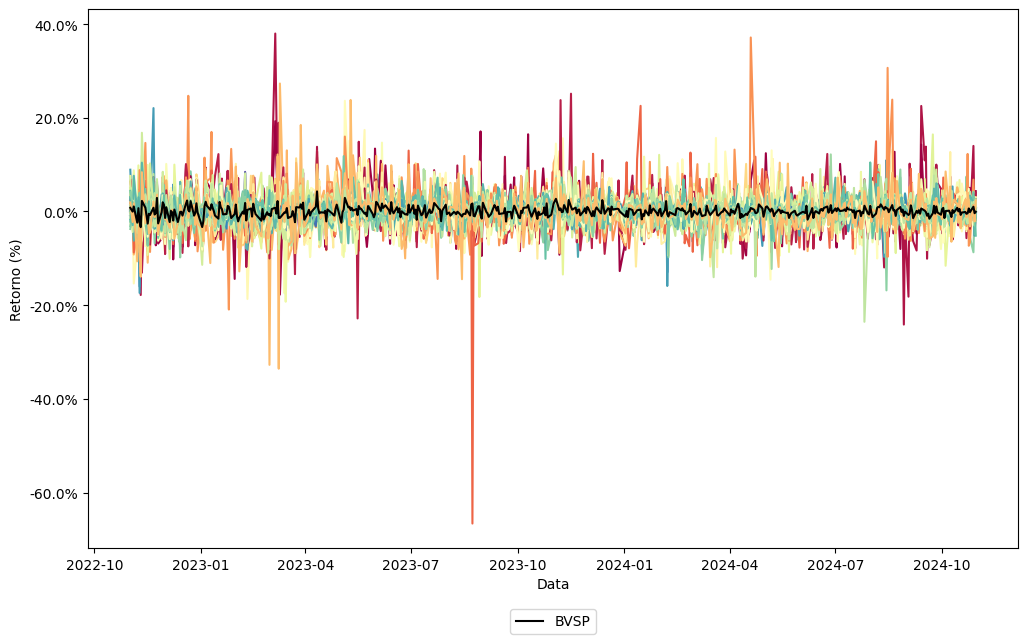

In [ ]:
# Calcular as diferenças e a intensidade
retorno_ibov_valor = retornos_ibov['^BVSP']
diferencas = retornos_b3.subtract(retorno_ibov_valor, axis=0).abs()

# Normalizar as diferenças para obter uma intensidade entre 0 e 1
max_val = diferencas.max().max()
intensidade = (1 - (diferencas / max_val)) if max_val != 0 else 0

# Calcular a intensidade média para cada ticker
intensidade_media = intensidade.mean()
intensidade_min = intensidade_media.min()
intensidade_max = intensidade_media.max()
intensidade_media = (intensidade_media - intensidade_min) / (intensidade_max - intensidade_min)

cmap = plt.cm.Spectral
plt.figure(figsize=(12, 7))

# Plotar cada ação com uma cor baseada na diferenca
for i, column in enumerate(retornos_b3.columns):
    ticker_intensity = intensidade_media[column]
    color = cmap(ticker_intensity)

    plt.plot(retornos_b3.index, retornos_b3[column], color=color, linewidth=1.5)

plt.plot(retornos_ibov.index, retornos_ibov, label='BVSP', color='black', linewidth=1.5)

plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.1f}%'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=12)
plt.show()

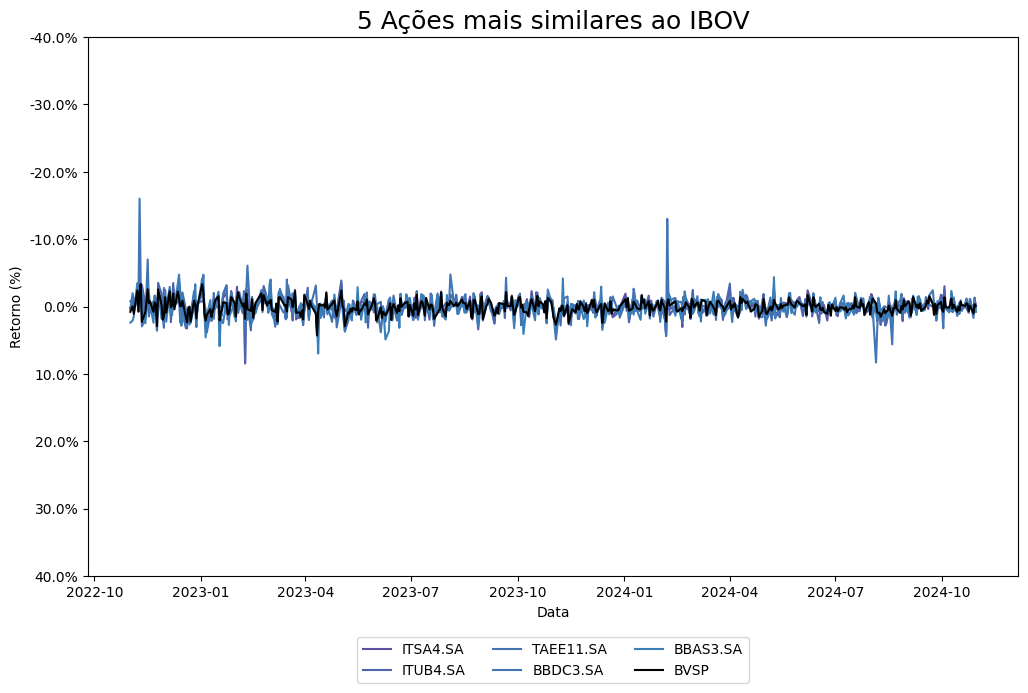

In [ ]:
# Calcular as diferenças e a intensidade
retorno_ibov_valor = retornos_ibov['^BVSP']
diferencas = retornos_b3.subtract(retorno_ibov_valor, axis=0).abs()

# Normalizar as diferenças para obter uma intensidade entre 0 e 1
max_val = diferencas.max().max()
intensidade = (1 - (diferencas / max_val)) if max_val != 0 else 0

# Calcular a intensidade média para cada ticker
intensidade_media = intensidade.mean()
intensidade_min = intensidade_media.min()
intensidade_max = intensidade_media.max()
intensidade_media = (intensidade_media - intensidade_min) / (intensidade_max - intensidade_min)

# Selecionar as 5 ações com maiores diferenças médias
top5_tickers = intensidade_media.nlargest(5).index

# Configurar o mapa de cores
cmap = plt.cm.Spectral
plt.figure(figsize=(12, 7))

# Plotar cada uma das 5 ações selecionadas com base na intensidade de cor
for column in top5_tickers:
    ticker_intensity = intensidade_media[column]
    color = cmap(ticker_intensity)
    plt.plot(retornos_b3.index, retornos_b3[column], color=color, linewidth=1.5, label=column)

plt.plot(retornos_ibov.index, retornos_ibov, label='BVSP', color='black', linewidth=1.5)

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.1f}%'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title("5 Ações mais similares ao IBOV", fontsize=18)
plt.ylim(0.40, -0.40)
plt.show()

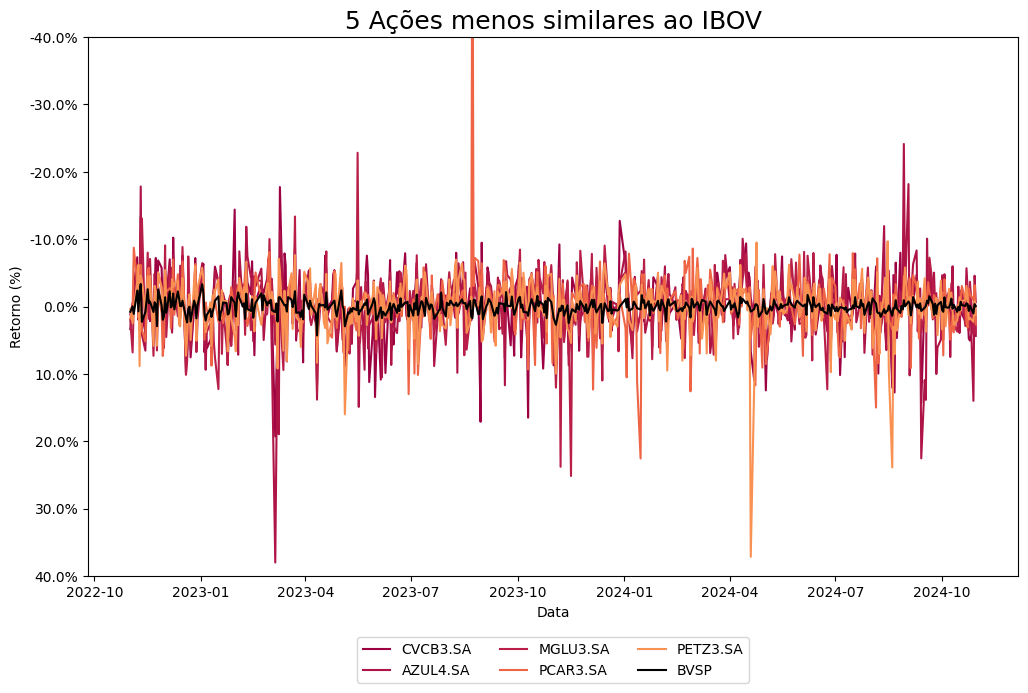

In [ ]:
# Calcular as diferenças e a intensidade
retorno_ibov_valor = retornos_ibov['^BVSP']
diferencas = retornos_b3.subtract(retorno_ibov_valor, axis=0).abs()

# Normalizar as diferenças para obter uma intensidade entre 0 e 1
max_val = diferencas.max().max()
intensidade = (1 - (diferencas / max_val)) if max_val != 0 else 0

# Calcular a intensidade média para cada ticker
intensidade_media = intensidade.mean()
intensidade_min = intensidade_media.min()
intensidade_max = intensidade_media.max()
intensidade_media = (intensidade_media - intensidade_min) / (intensidade_max - intensidade_min)

# Selecionar as 5 ações com maiores diferenças médias
top5_tickers = intensidade_media.nsmallest(5).index

# Configurar o mapa de cores
cmap = plt.cm.Spectral
plt.figure(figsize=(12, 7))

# Plotar cada uma das 5 ações selecionadas com base na intensidade de cor
for column in top5_tickers:
    ticker_intensity = intensidade_media[column]
    color = cmap(ticker_intensity)
    plt.plot(retornos_b3.index, retornos_b3[column], color=color, linewidth=1.5, label=column)

# Plotar o índice BVSP
plt.plot(retornos_ibov.index, retornos_ibov, label='BVSP', color='black', linewidth=1.5)

# Configurações do gráfico
plt.xlabel('Data')
plt.ylabel('Retorno (%)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.1f}%'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title("5 Ações menos similares ao IBOV", fontsize=18)
plt.ylim(0.40, -0.40)
plt.show()

### Regressão Linear

In [ ]:
# Obter os dados do IBOV e do S&P 100
dados_ibov_renamed = dados_ibov.rename(columns={'^BVSP': 'Preco_Ajustado'})

dados_ibov_renamed['Indice'] = dados_ibov_renamed.index.astype(int) / 10**9
modelo_ibov = sm.ols('Preco_Ajustado ~ Indice', data=dados_ibov_renamed).fit()
media_regressao_ibov = modelo_ibov.predict(dados_ibov_renamed).mean()

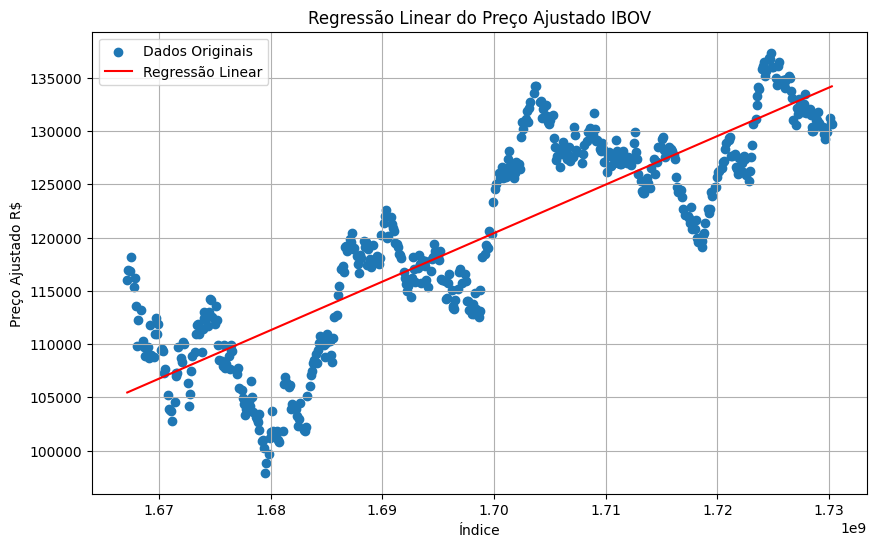

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(dados_ibov_renamed['Indice'], dados_ibov_renamed['Preco_Ajustado'], label='Dados Originais')
plt.plot(dados_ibov_renamed['Indice'], modelo_ibov.predict(dados_ibov_renamed), color='red', label='Regressão Linear')
plt.xlabel('Índice')
plt.ylabel('Preço Ajustado R$')
plt.title('Regressão Linear do Preço Ajustado IBOV')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


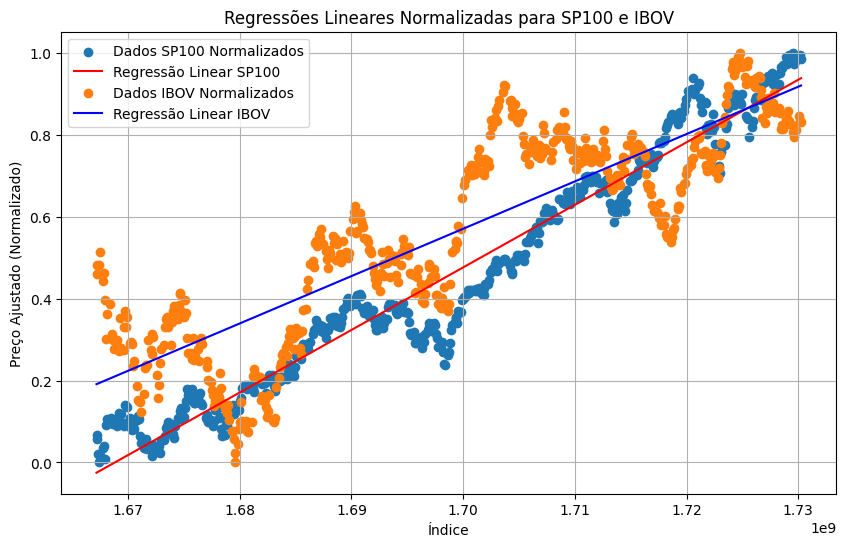

In [ ]:
# Normalizar os dados
scaler_sp = MinMaxScaler()
scaler_ibov = MinMaxScaler()

# Normalizar os valores reais de Preco_Ajustado para ambos os índices
sp100_dados_renamed['Preco_Ajustado_Normalizado'] = scaler_sp.fit_transform(sp100_dados_renamed[['Preco_Ajustado']])
dados_ibov_renamed['Preco_Ajustado_Normalizado'] = scaler_ibov.fit_transform(dados_ibov_renamed[['Preco_Ajustado']])

# Normalizar as previsões das regressões lineares
sp100_pred_normalized = scaler_sp.transform(np.array(modelo_sp100.predict(sp100_dados_renamed)).reshape(-1, 1))
ibov_pred_normalized = scaler_ibov.transform(np.array(modelo_ibov.predict(dados_ibov_renamed)).reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 6))

# Gráfico do SP100
plt.scatter(sp100_dados_renamed['Indice'], sp100_dados_renamed['Preco_Ajustado_Normalizado'], label='Dados SP100 Normalizados')
plt.plot(sp100_dados_renamed['Indice'], sp100_pred_normalized, color='red', label='Regressão Linear SP100')

# Gráfico do IBOV
plt.scatter(dados_ibov_renamed['Indice'], dados_ibov_renamed['Preco_Ajustado_Normalizado'], label='Dados IBOV Normalizados')
plt.plot(dados_ibov_renamed['Indice'], ibov_pred_normalized, color='blue', label='Regressão Linear IBOV')

# Configurações do gráfico
plt.xlabel('Índice')
plt.ylabel('Preço Ajustado (Normalizado)')
plt.title('Regressões Lineares Normalizadas para SP100 e IBOV')
plt.legend()
plt.grid(True)
plt.show()


### Boxplot

<ipython-input-56-106450ace150>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=dados_ibov_renamed['Preco_Ajustado'], palette="Set2")


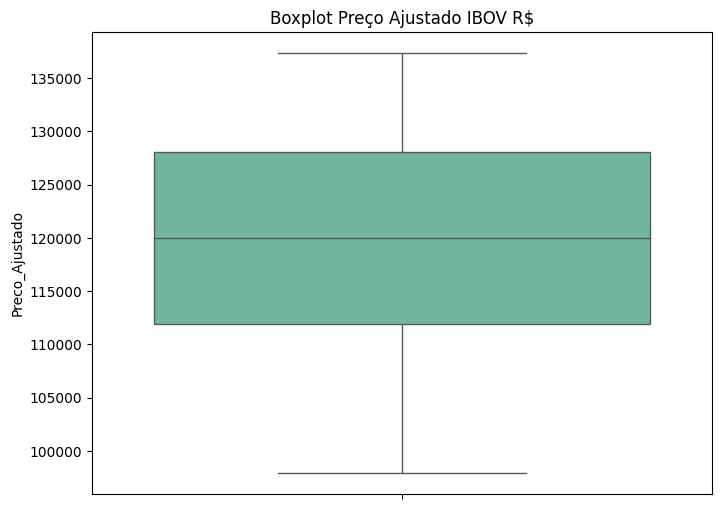

In [ ]:
ibov_boxplot = plt.figure(figsize=(8, 6))
sns.boxplot(y=dados_ibov_renamed['Preco_Ajustado'], palette="Set2")
plt.title('Boxplot Preço Ajustado IBOV R$')
plt.show()

<ipython-input-57-8de89cc3b003>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_normalizados, x='Indice', y='Preco Ajustado Normalizado',palette='Set2')


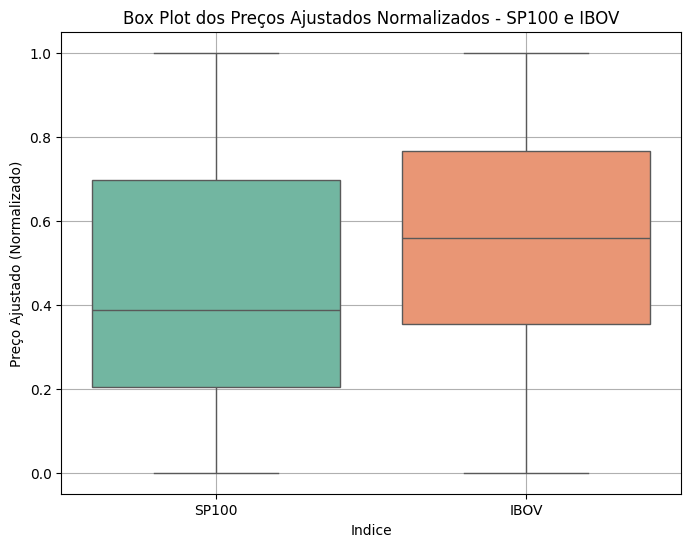

In [ ]:
# Organizando os dados para o Seaborn
sp100_dados_renamed['Indice'] = 'SP100'
dados_ibov_renamed['Indice'] = 'IBOV'

# Concatenando os dados normalizados em um único DataFrame
dados_normalizados = pd.concat([
    sp100_dados_renamed[['Preco_Ajustado_Normalizado', 'Indice']],
    dados_ibov_renamed[['Preco_Ajustado_Normalizado', 'Indice']]
])

# Renomeando a coluna para um nome genérico
dados_normalizados = dados_normalizados.rename(columns={'Preco_Ajustado_Normalizado': 'Preco Ajustado Normalizado'})

# Criando o box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=dados_normalizados, x='Indice', y='Preco Ajustado Normalizado',palette='Set2')
plt.ylabel('Preço Ajustado (Normalizado)')
plt.title('Box Plot dos Preços Ajustados Normalizados - SP100 e IBOV')
plt.grid(True)
plt.show()

# Otimização de pesos

## Funções e constantes

In [ ]:
import gurobipy as gp
from gurobipy import GRB
from sklearn.metrics import mean_squared_error, mean_absolute_error


timeout_s = 60
min_weight = 1e-6


def compute_metrics(portfolio_returns, returns_index):
    combined_df = pd.concat([portfolio_returns, returns_index], axis=1, join='inner')
    portfolio_aligned = combined_df.iloc[:, 0]
    index_aligned = combined_df.iloc[:, 1]

    mse = mean_squared_error(portfolio_aligned, index_aligned)

    mae = mean_absolute_error(portfolio_aligned, index_aligned)

    correlation = portfolio_aligned.corr(index_aligned)

    r_squared = correlation ** 2

    return mse, mae, correlation, r_squared


def plot_metrics(correlation_list, r_squared_list, mse_list, mae_list, n_k):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    fig.patch.set_facecolor('#2A504E')
    ax1.set_facecolor('#2A504E')
    ax2.set_facecolor('#2A504E')

    ax1.plot(n_k, correlation_list, label='Correlação', marker='o', color='g')
    ax1.plot(n_k, r_squared_list, label='R-squared', marker='o', color='r')
    ax1.set_xlabel('k', color='white')
    ax1.set_ylabel('Valor', color='white')
    ax1.set_title('Correlação e R-squared para diferentes valores de k', color='white')
    ax1.legend()
    ax1.grid(True)
    ax1.tick_params(axis='x', colors='white')
    ax1.tick_params(axis='y', colors='white')

    ax2.plot(n_k, mse_list, label='MSE', marker='o', color='b')
    ax2.plot(n_k, mae_list, label='MAE', marker='o', color='purple')
    ax2.set_xlabel('k', color='white')
    ax2.set_ylabel('Valor', color='white')
    ax2.set_title('MSE e MAE para diferentes valores de k', color='white')
    ax2.legend()
    ax2.grid(True)
    ax2.tick_params(axis='x', colors='white')
    ax2.tick_params(axis='y', colors='white')

    plt.tight_layout()

    plt.show()


def plot_with_periodic_colors(ax, x, y, period_months, colors):
    x = pd.to_datetime(x)

    start_date = x[0]
    end_date = start_date + pd.DateOffset(months=period_months)

    current_period = 0

    for i in range(len(x) - 1):
        if x[i] >= start_date and x[i] < end_date:
            if i == 0 or x[i-1] < start_date:
                start_idx = i
            end_idx = i
        else:
            ax.plot(x[start_idx:end_idx + 1], y[start_idx:end_idx + 1], color=colors[current_period % len(colors)], linewidth=2)
            ax.axvline(x=x[end_idx], color=colors[current_period % len(colors)], linestyle='--', linewidth=1)

            start_date = x[i]
            end_date = start_date + pd.DateOffset(months=period_months)
            start_idx = i
            current_period += 1

    ax.plot(x[start_idx:], y[start_idx:], color=colors[current_period % len(colors)], linewidth=2)
    ax.axvline(x=x[end_idx], color=colors[current_period % len(colors)], linestyle='--', linewidth=1)


def compute_portfolio_returns_cum(K, all_weights, returns_data):
    print(f"\nProcessing cumulative portfolio returns for K={K}...")

    final_portfolio_returns = []

    for i in range(len(returns_data) - 1):
        period_weights = all_weights[all_weights['Period'] == f"Period {i+1}"]

        returns_ex_period = returns_data[f"Period {i+1}"]['returns_ex']
        returns_ex_next_period = returns_data[f"Period {i+2}"]['returns_ex']

        # Calculate weighted returns for the current period (first iteration only)
        if i == 0:
            weighted_returns = (
                returns_ex_period[period_weights['Stock']] * period_weights['Weight'].values
            ).sum(axis=1)
            final_portfolio_returns.append(weighted_returns)

        weighted_returns = (
            returns_ex_next_period[period_weights['Stock']] * period_weights['Weight'].values
        ).sum(axis=1)
        final_portfolio_returns.append(weighted_returns)

    final_portfolio_returns_df = pd.concat(final_portfolio_returns, axis=0)
    final_portfolio_returns_df.index = pd.to_datetime(final_portfolio_returns_df.index)
    final_portfolio_returns_df = (1 + final_portfolio_returns_df).cumprod() - 1

    returns_index_df = pd.DataFrame()
    for period, data in returns_data.items():
        returns_index = data['returns_index']
        returns_index_df = pd.concat([returns_index_df, returns_index])

    returns_index_df.index = pd.to_datetime(returns_index_df.index)
    returns_index_df = (1 + returns_index_df).cumprod() - 1

    return final_portfolio_returns_df, returns_index_df



def compute_portfolio_returns(K, all_weights, returns_data):
    print(f"\nProcessing portfolio returns for K={K}...")

    final_portfolio_returns = []

    for i in range(len(returns_data) - 1):
        period_weights = all_weights[all_weights['Period'] == f"Period {i+1}"]

        returns_ex_period = returns_data[f"Period {i+1}"]['returns_ex']
        returns_ex_next_period = returns_data[f"Period {i+2}"]['returns_ex']

        # Calculate weighted returns for the current period (first iteration only)
        if i == 0:
            weighted_returns = (returns_ex_period[period_weights['Stock']] * period_weights['Weight'].values).sum(axis=1)
            final_portfolio_returns.append(weighted_returns)

        weighted_returns = (returns_ex_next_period[period_weights['Stock']] * period_weights['Weight'].values).sum(axis=1)
        final_portfolio_returns.append(weighted_returns)

    final_portfolio_returns_df = pd.concat(final_portfolio_returns, axis=0)

    returns_index_df = pd.DataFrame()
    for period, data in returns_data.items():
        returns_index = data['returns_index']
        returns_index_df = pd.concat([returns_index_df, returns_index])

    return final_portfolio_returns_df, returns_index_df


def plot_portfolio_composition(selected_stocks, optimized_weights, k):
    portfolio_data = pd.DataFrame({
        'Stock': selected_stocks,
        'Weight': optimized_weights * 100
    }).sort_values(by='Weight', ascending=False)

    fig, ax = plt.subplots(figsize=(8, 5))
    fig.patch.set_facecolor('#2A504E')
    ax.set_facecolor('#2A504E')

    squarify.plot(
        sizes=portfolio_data['Weight'],
        label=portfolio_data['Stock'],
        alpha=0.8,
        color=plt.cm.tab20.colors[:len(portfolio_data)],
    )

    plt.axis('off')
    plt.title(f"Composição da Carteira Otimizada para k = {k} (%)", color='white')
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor('#2A504E')
    ax.set_facecolor('#2A504E')

    ax.bar(portfolio_data['Stock'], portfolio_data['Weight'], color='tab:blue', alpha=0.85)
    ax.set_xlabel('Ações', color='white')
    ax.set_ylabel('Peso (%)', color='white')
    ax.set_title(f'Pesos das Ações na Carteira Otimizada para k = {k}', color='white')

    ax.tick_params(axis='x', colors='white', rotation=45)
    ax.tick_params(axis='y', colors='white')

    for index, value in enumerate(portfolio_data['Weight']):
        ax.text(
            index, value + 0.5, f"{value:.2f}%",
            ha='center', color='white', fontsize=10,
            rotation=45, va='bottom'
        )

    plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


def populate_and_solve(m, returns_ex, returns_index, n_stocks_total, n_stocks_selected, time_periods):
    m.setParam('TimeLimit', timeout_s)

    weights = m.addVars(n_stocks_total, lb=min_weight, ub=1, name="weights")

    # Add a constraint to ensure selected stocks have positive weights above a threshold
    # m.addConstrs(weights[j] >= min_weight * select[j] for j in range(n_stocks_total))

    select = m.addVars(n_stocks_total, vtype=GRB.BINARY, name="select")

    # Constraint: Only n stocks are selected
    m.addConstr(gp.quicksum(select[j] for j in range(n_stocks_total)) == n_stocks_selected, "select_n")

    # Constraint: Weights sum to 1 (only for selected stocks)
    m.addConstr(gp.quicksum(weights[j] for j in range(n_stocks_total)) == 1, "weight_sum")

    # Constraint: Set weights to zero for unselected stocks
    for j in range(n_stocks_total):
        m.addConstr(weights[j] <= select[j], f"weight_zero_{j}")

    # Define portfolio return for each period
    portfolio_returns = [
        gp.quicksum(returns_ex.iloc[t, j] * weights[j] for j in range(n_stocks_total))
        for t in range(time_periods)
    ]

    # Objective: Minimize tracking error (sum of squared differences)
    tracking_error = gp.quicksum((portfolio_returns[t] - returns_index.iloc[t, 0]) ** 2 for t in range(time_periods))
    m.setObjective(tracking_error, GRB.MINIMIZE)

    # m.tune()
    m.optimize()

    # Extract the selected stocks and their weights
    selected_stocks = [returns_ex.columns[j] for j in range(n_stocks_total) if select[j].X > 0.5]
    optimized_weights = np.array([weights[j].X for j in range(n_stocks_total) if select[j].X > 0.5])

    # Print the selected stocks and weights
    if m.status == GRB.OPTIMAL:
        print("Optimal Stocks and Weights:")
        for i, stock in enumerate(selected_stocks):
            print(f"Stock {stock}: Weight {optimized_weights[i]:.4f}")
        print(f"Minimum Tracking Error: {m.ObjVal:.4f}")
    else:
        print("No optimal solution found.")

    return selected_stocks, optimized_weights


def read_license_file(file_path):
    license_data = {}

    try:
        with open(file_path, 'r') as f:
            for line in f:
                if '=' in line:
                    key, value = line.strip().split('=', 1)
                    license_data[key] = value
    except FileNotFoundError:
        raise FileNotFoundError(f"The file '{file_path}' was not found. Please check the file path.")
    except IOError as e:
        raise IOError(f"An error occurred while reading the file '{file_path}': {e}")

    WLSACCESSID = license_data.get('WLSACCESSID')
    WLSSECRET = license_data.get('WLSSECRET')
    LICENSEID = int(license_data.get('LICENSEID'))

    params = {
        "WLSACCESSID": WLSACCESSID,
        "WLSSECRET": WLSSECRET,
        "LICENSEID": LICENSEID,
    }

    return params


def get_weights(returns_ex, returns_index, n_stocks_selected):
    n_stocks_total = returns_ex.shape[1]
    time_periods = returns_ex.shape[0]

    filepath = "gurobi.lic"
    params = read_license_file(filepath)

    with gp.Env(params=params) as env:
        with gp.Model(env=env) as model:
            try:
                selected_stocks, optimized_weights = populate_and_solve(model, returns_ex, returns_index, n_stocks_total, n_stocks_selected, time_periods)
                return selected_stocks, optimized_weights
            except Exception as e:
                print(f"An error occurred: {e}")


def calculate_weights_for_periods(returns_data, n_stocks_selected):
    all_weights = pd.DataFrame()

    for period, data in returns_data.items():
        print(f"Processing {period}...")

        # Skip the last period for weights since it won't be used
        if period == f"Period {len(returns_data)}":
            print(f"Skipping weights calculation for {period}")
            continue

        returns_ex = data['returns_ex']
        returns_index = data['returns_index']

        selected_stocks, optimized_weights = get_weights(returns_ex, returns_index, n_stocks_selected)

        period_weights = pd.DataFrame({
            'Stock': selected_stocks,
            'Weight': optimized_weights,
            'Period': period
        })

        all_weights = pd.concat([all_weights, period_weights], axis=0, ignore_index=True)

    return all_weights


def process_period_weights(returns_ex, returns_index, start_date, end_date):
    returns_ex_period = returns_ex[(returns_ex.index >= start_date) & (returns_ex.index <= end_date)].copy()
    returns_index_period = returns_index[(returns_index.index >= start_date) & (returns_index.index <= end_date)].copy()

    returns_ex_period = returns_ex_period.ffill()
    returns_index_period = returns_index_period.ffill()

    return returns_ex_period, returns_index_period


def split_data_into_periods(returns_ex, returns_index, start_date, end_date, months_per_period):
    periods = []
    current_start_date = start_date

    while current_start_date < end_date:
        month_end = current_start_date + dt.timedelta(days=months_per_period * 30)
        period_end_date = min(month_end, end_date)

        returns_ex_period, returns_index_period = process_period_weights(returns_ex, returns_index, current_start_date, period_end_date)
        periods.append((returns_ex_period, returns_index_period))

        current_start_date = period_end_date + dt.timedelta(days=1)

    return periods

## S&P100

#### Inicializando

In [ ]:
start_date_year = dt.datetime(2023, 1, 1)
end_date_year = dt.datetime(2023, 12, 31)
filepath = 'pre_processed_data/bkp_pre_processed_parsed_SP100.csv'
tickers = []

with open(filepath, 'r') as file:
  for line in file:
    tickers.extend(line.strip().split(','))

returns_sp100_adj_close = obter_dados(['^OEX'], start_date_year, end_date_year).dropna()
returns_nasdaq_nyse_adj_close = obter_dados(tickers, start_date_year, end_date_year).dropna()

returns_sp100_pct_change = returns_sp100_adj_close.pct_change().dropna()
returns_nasdaq_nyse_pct_change = returns_nasdaq_nyse_adj_close.pct_change().dropna()


# dealing with missing values using previous value
combined_index = returns_nasdaq_nyse_pct_change.index.union(returns_sp100_pct_change.index).sort_values()

returns_nasdaq_nyse_pct_change_full = returns_nasdaq_nyse_pct_change.reindex(combined_index)
returns_sp100_pct_change_full = returns_sp100_pct_change.reindex(combined_index)

returns_nasdaq_nyse_pct_change_full.ffill(inplace=True)
returns_sp100_pct_change_full.ffill(inplace=True)

months_per_period = 3

clear_output()

#### Separando períodos

In [ ]:
periods_ex1_pct_change = split_data_into_periods(returns_nasdaq_nyse_pct_change_full, returns_sp100_pct_change_full, start_date_year, end_date_year, months_per_period)

returns_data_ex1_pct_change = {}
for i, (returns_ex_period, returns_index_period) in enumerate(periods_ex1_pct_change, start=1):
    returns_data_ex1_pct_change[f"Period {i}"] = {
        'returns_ex': returns_ex_period,
        'returns_index': returns_index_period
    }

clear_output()

In [ ]:
for period, data in returns_data_ex1_pct_change.items():
    print(f"{period}:")
    print(f"  Returns for Ex: {data['returns_ex']}")
    print(f"  Returns for Index: {data['returns_index']}")
    print("=" * 50)

Period 1:
  Returns for Ex: Ticker          AAPL      ABBV       ABT       ACN      ADBE       AIG  \
Date                                                                     
2023-01-04  0.010314  0.008067  0.014875 -0.003404  0.013327  0.014778   
2023-01-05 -0.010605 -0.001222 -0.003687 -0.023613 -0.037990 -0.005481   
2023-01-06  0.036794  0.018717  0.013809  0.023690  0.013123  0.016375   
2023-01-09  0.004089 -0.029361 -0.001603  0.016864  0.027739 -0.010534   
2023-01-10  0.004456 -0.012495  0.015158  0.004311 -0.009591 -0.006576   
...              ...       ...       ...       ...       ...       ...   
2023-03-27 -0.012293 -0.003038  0.004181  0.007206 -0.004827  0.002535   
2023-03-28 -0.003980  0.004507 -0.013711  0.003796  0.000670  0.000843   
2023-03-29  0.019791 -0.001580  0.015549  0.017964  0.015426  0.025263   
2023-03-30  0.009890 -0.000506  0.004664  0.009717  0.007226  0.022998   
2023-03-31  0.015644  0.009182  0.022002  0.011144  0.009086  0.010839   

Ticker   

#### Conseguindo pesos para n Ks

In [ ]:
K_values = [15, 20, 30]
# K_values = list(range(5, 36))
all_weights_dict_nasdaq_nyse = {}

for k in K_values:
    print("=" * 50)
    print(f"\nProcessing with K={k}...")
    print("=" * 50)
    all_weights = calculate_weights_for_periods(returns_data_ex1_pct_change, k)
    all_weights_dict_nasdaq_nyse[k] = all_weights

clear_output()

In [ ]:
for K, all_weights in all_weights_dict_nasdaq_nyse.items():
    print(f"\nAll Weights for K={K}:")
    print(all_weights)
    print("=" * 50)


All Weights for K=15:
    Stock    Weight    Period
0    AAPL  0.104575  Period 1
1    ABBV  0.080348  Period 1
2     AMT  0.031716  Period 1
3       C  0.047833  Period 1
4     CVS  0.046760  Period 1
5     DIS  0.111071  Period 1
6     EMR  0.055055  Period 1
7      GE  0.032105  Period 1
8      GM  0.032508  Period 1
9   GOOGL  0.103456  Period 1
10    LLY  0.057444  Period 1
11   MDLZ  0.109787  Period 1
12    MET  0.036160  Period 1
13   MSFT  0.112095  Period 1
14   NVDA  0.039000  Period 1
15   AAPL  0.174675  Period 2
16   AMZN  0.052049  Period 2
17    AXP  0.057257  Period 2
18   CSCO  0.091353  Period 2
19   GOOG  0.066575  Period 2
20    HON  0.055446  Period 2
21    JNJ  0.085754  Period 2
22    KHC  0.046868  Period 2
23   MDLZ  0.067494  Period 2
24     MS  0.048664  Period 2
25   MSFT  0.077610  Period 2
26   NVDA  0.032130  Period 2
27    RTX  0.068872  Period 2
28   TSLA  0.022656  Period 2
29    UPS  0.052511  Period 2
30   AAPL  0.120855  Period 3
31   AMZN  0.0724

#### Plot desempenho e carteira otimizada

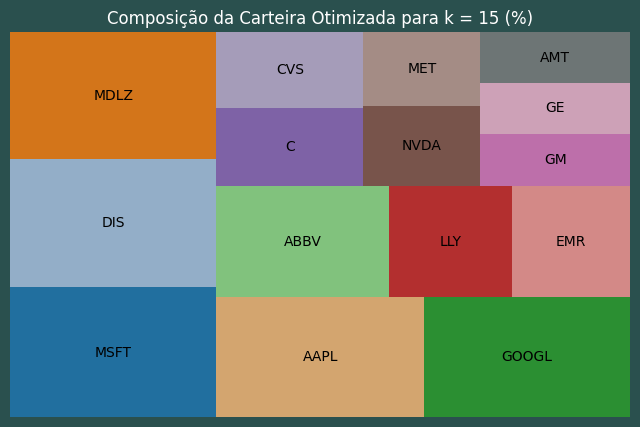

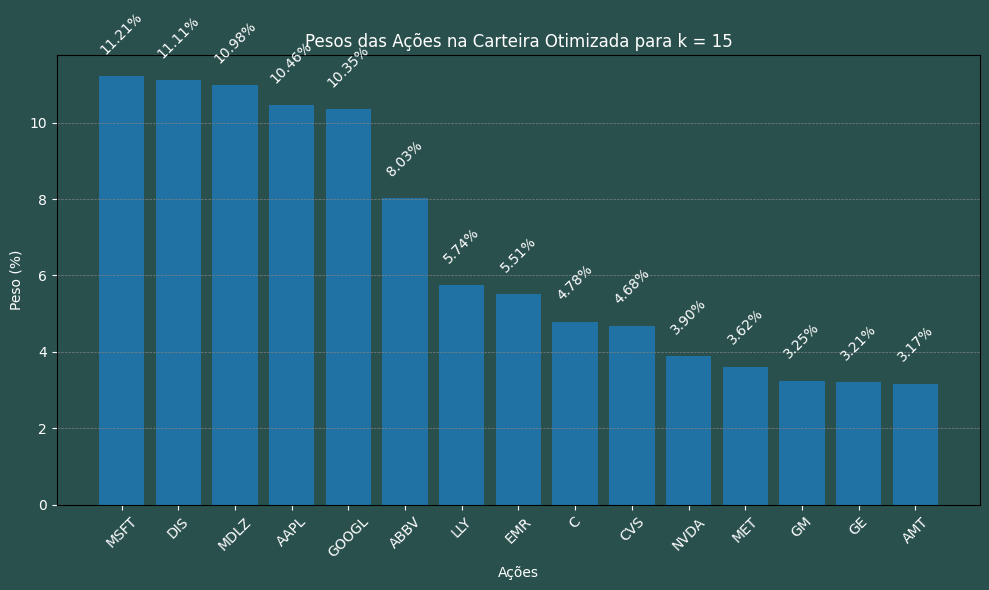

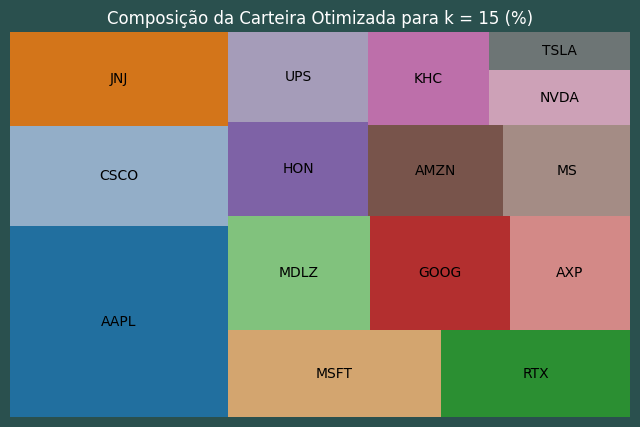

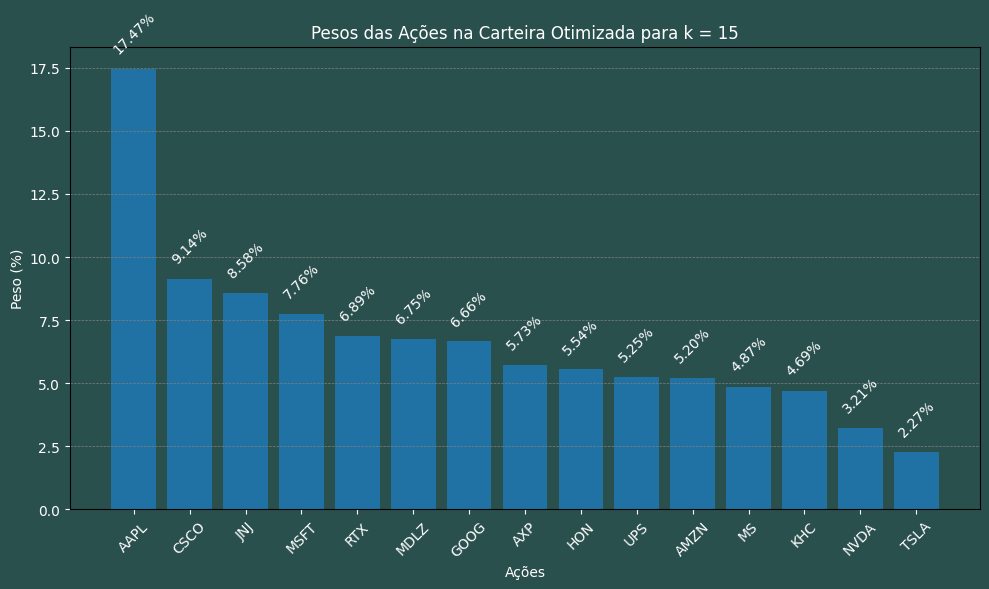

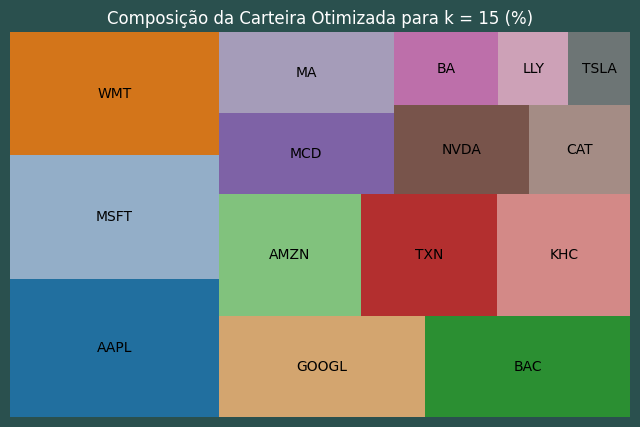

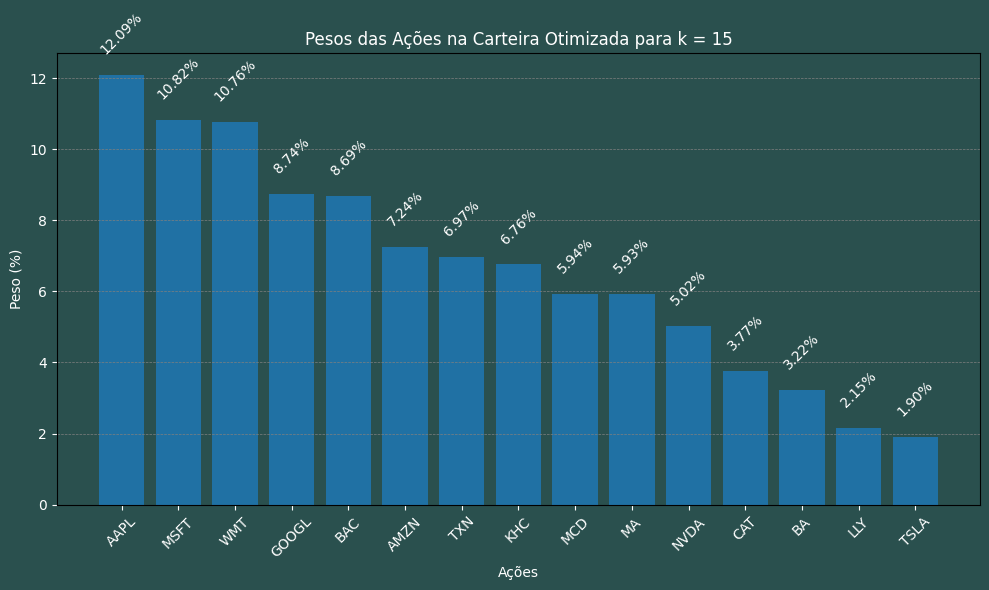


Processing cumulative portfolio returns for K=15...


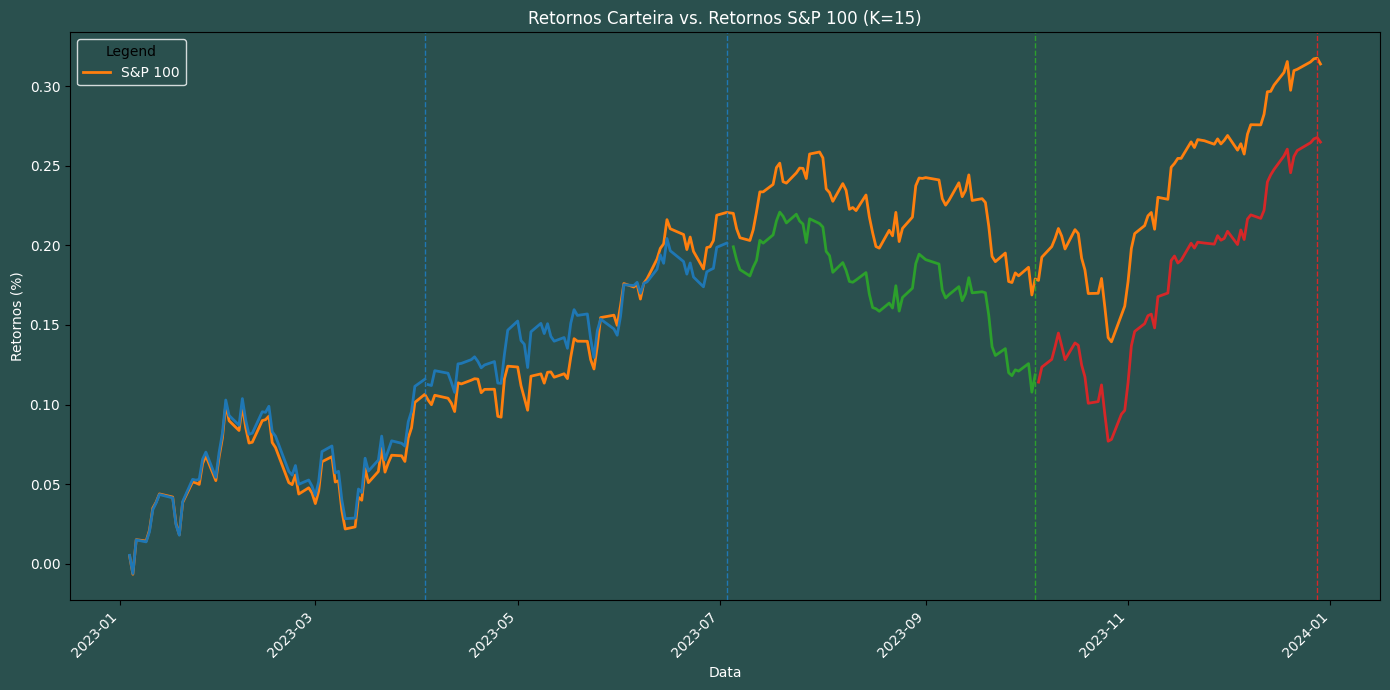

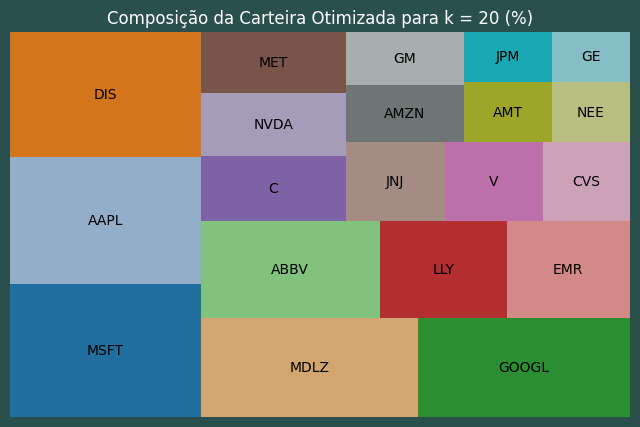

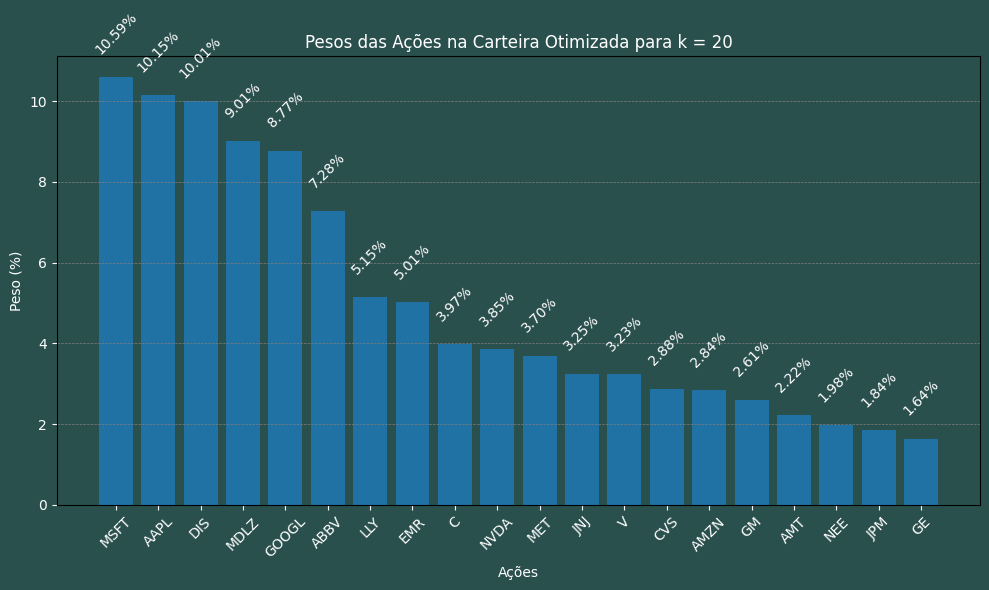

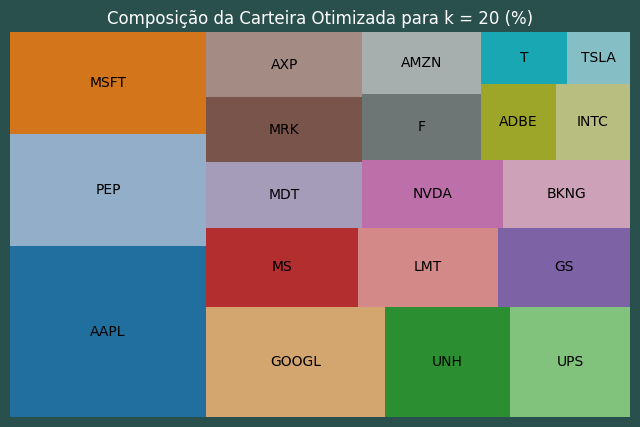

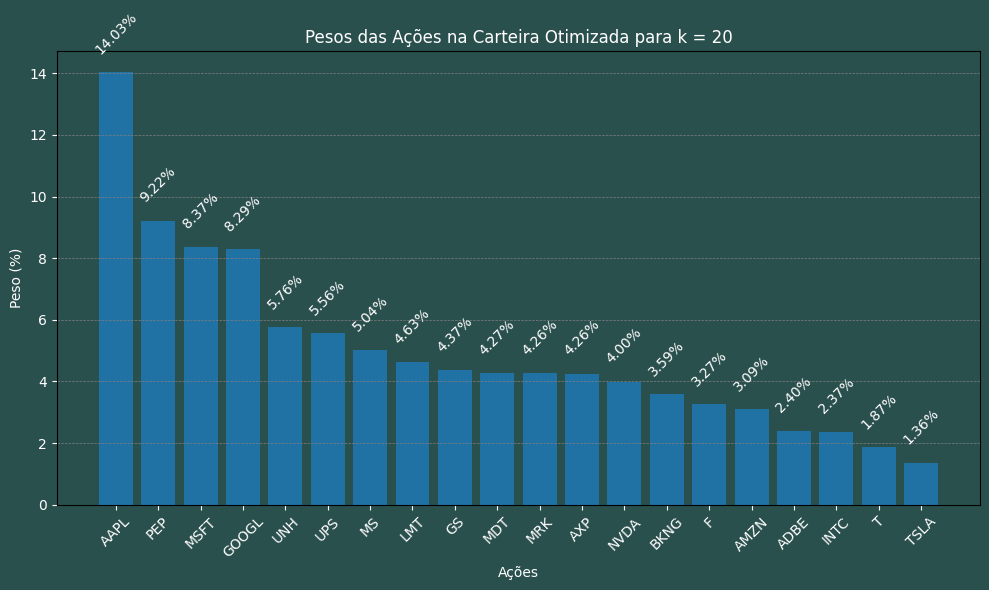

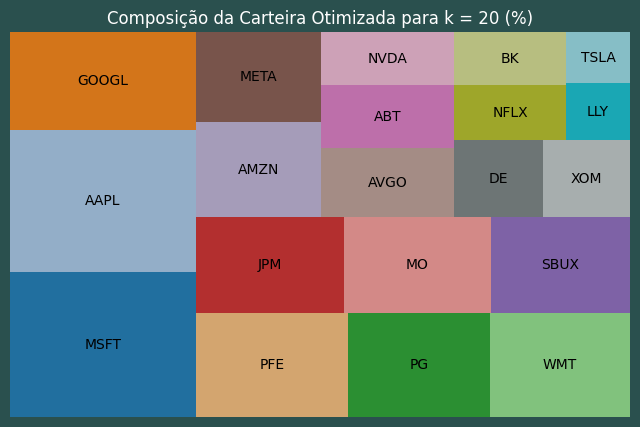

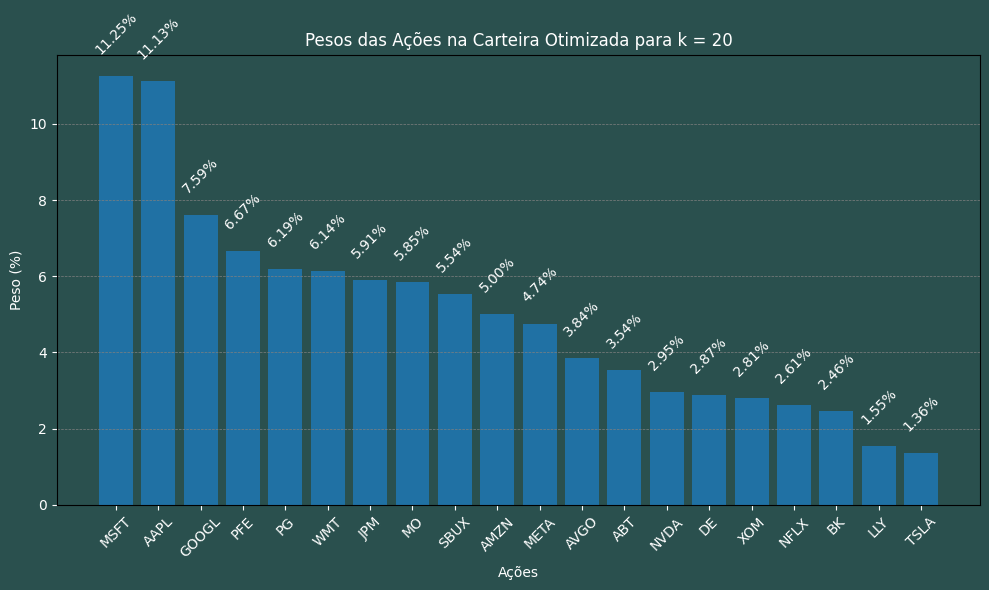


Processing cumulative portfolio returns for K=20...


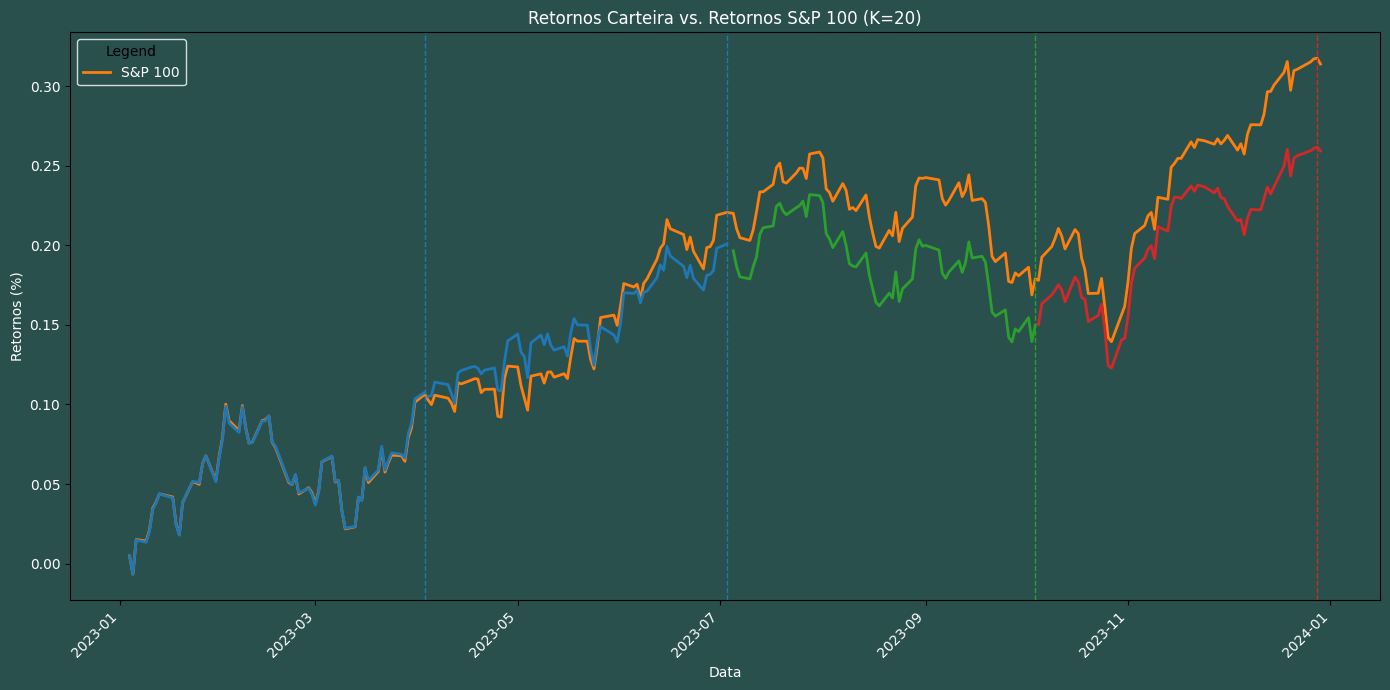

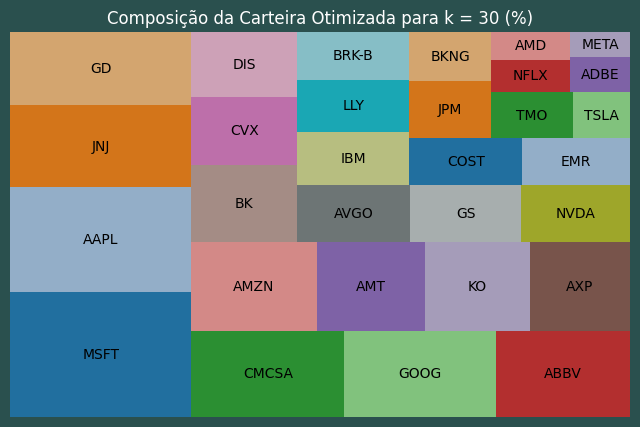

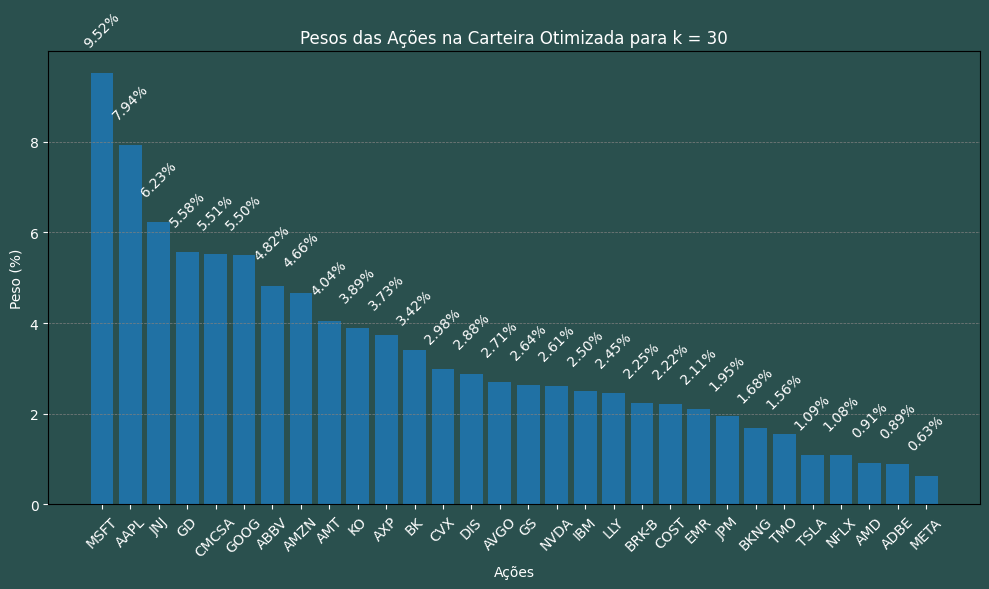

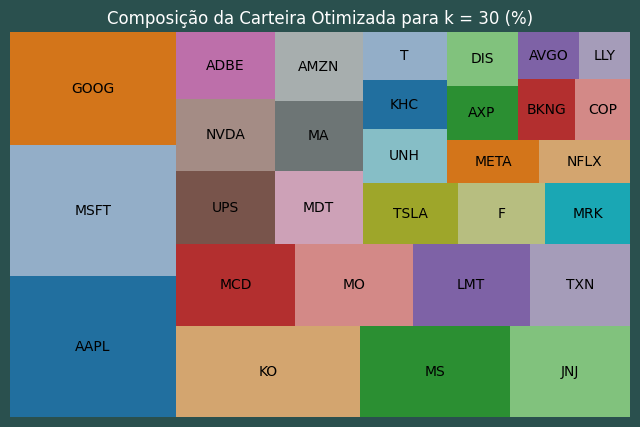

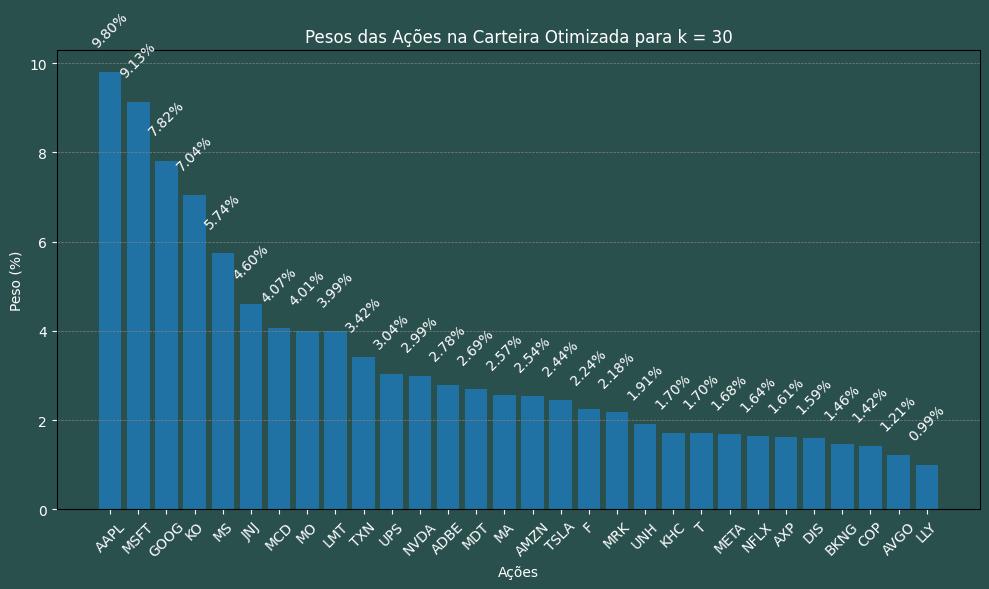

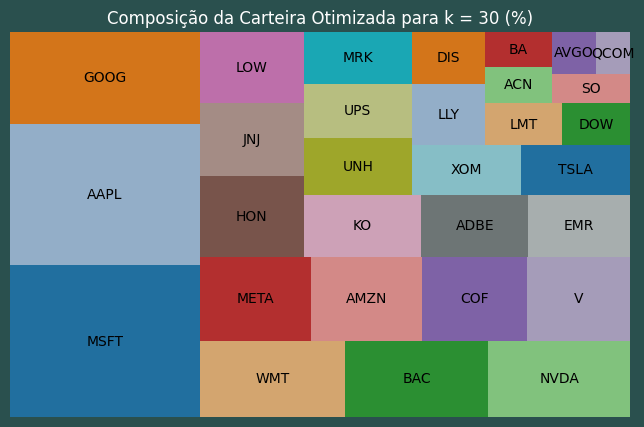

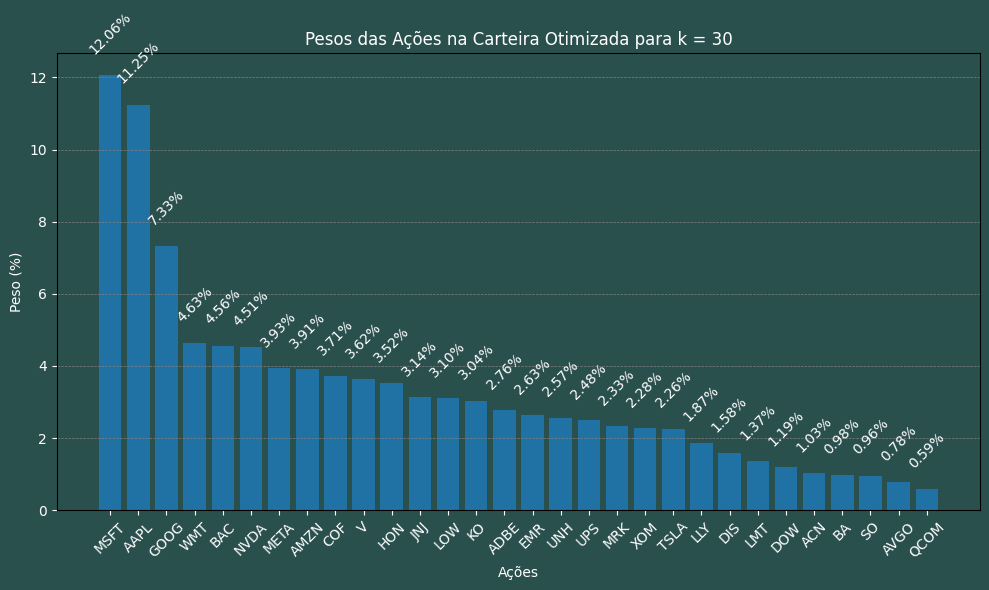


Processing cumulative portfolio returns for K=30...


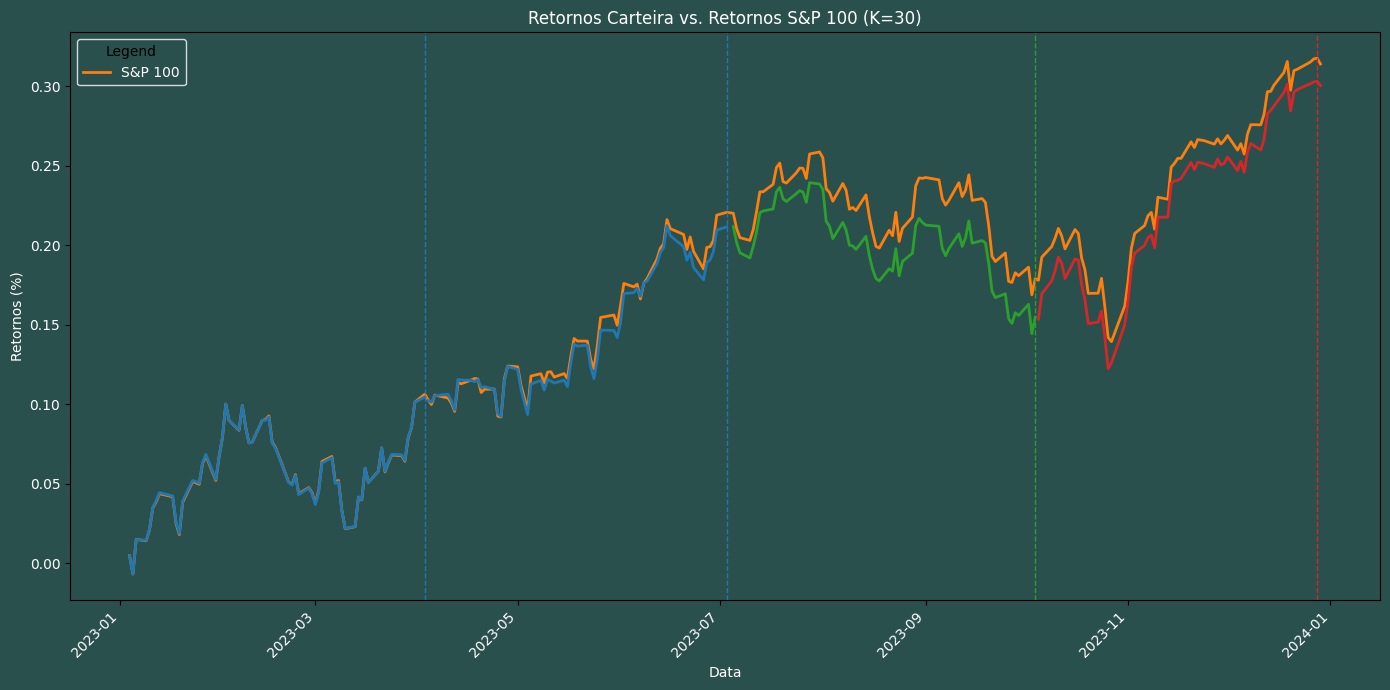

In [ ]:
import matplotlib.ticker as ticker
from matplotlib.colors import to_rgba

for k, all_weights in all_weights_dict_nasdaq_nyse.items():
    for period in all_weights['Period'].unique():
        period_weights = all_weights[all_weights['Period'] == period]

        selected_stocks = period_weights['Stock']
        weights = period_weights['Weight']

        plot_portfolio_composition(selected_stocks, weights, k)

    # Cumulative % returns
    portfolio_returns, returns_index = compute_portfolio_returns_cum(k, all_weights, returns_data_ex1_pct_change)

    fig, ax = plt.subplots(figsize=(14, 7))
    fig.patch.set_facecolor('#2A504E')
    ax.set_facecolor('#2A504E')

    ax.plot(returns_index.index, returns_index['^OEX'], label='S&P 100', linewidth=2, color='tab:orange')

    plot_with_periodic_colors(ax, portfolio_returns.index, portfolio_returns, 3, ['tab:blue', 'tab:blue', 'tab:green', 'tab:red', 'tab:red'])

    ax.set_title(f'Retornos Carteira vs. Retornos S&P 100 (K={k})', color='white')
    ax.set_xlabel('Data', color='white')
    ax.set_ylabel('Retornos (%)', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    ax.legend(title='Legend', facecolor='#2A504E', labelcolor='white', edgecolor='white', loc='best', frameon=True)

    plt.xticks(rotation=45, ha='right', color='white')
    plt.yticks(color='white')

    plt.tight_layout()
    plt.show()

#### Métricas


Processing portfolio returns for K=15...

Processing portfolio returns for K=20...

Processing portfolio returns for K=30...


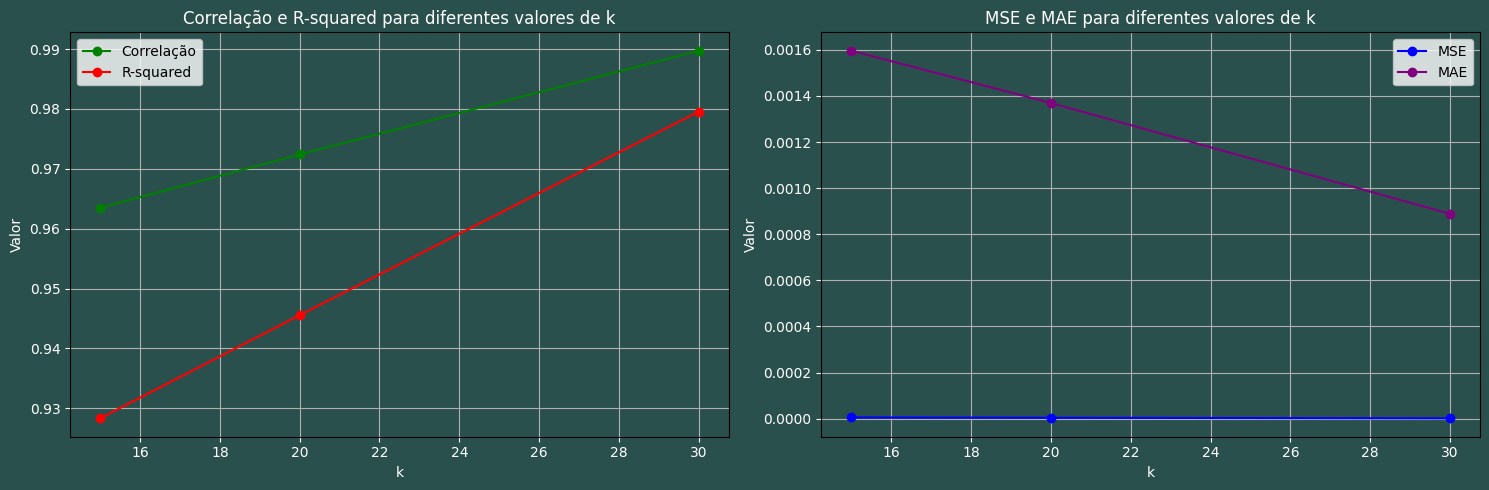

In [ ]:
mae_list = []
mse_list = []
correlation_list = []
r_squared_list = []
n_k = []

for k, all_weights in all_weights_dict_nasdaq_nyse.items():
    portfolio_returns, returns_index = compute_portfolio_returns(k, all_weights, returns_data_ex1_pct_change)

    mse, mae, correlation, r_squared = compute_metrics(portfolio_returns, returns_index)

    mae_list.append(mae)
    mse_list.append(mse)
    correlation_list.append(correlation)
    r_squared_list.append(r_squared)
    n_k.append(k)

plot_metrics(correlation_list, r_squared_list, mse_list, mae_list, n_k)

## IBOV

#### Inicializando

In [ ]:
start_date_year = dt.datetime(2023, 1, 1)
end_date_year = dt.datetime(2023, 12, 31)
filepath = 'pre_processed_data/bkp_pre_processed_parsed_B3.csv'
tickers = []

with open(filepath, 'r') as file:
  for line in file:
    tickers.extend(line.strip().split(','))

returns_ibov_adj_close = obter_dados(['^BVSP'], start_date_year, end_date_year).dropna()
returns_b3_adj_close = obter_dados(tickers, start_date_year, end_date_year).dropna()

returns_ibov_pct_change = returns_ibov_adj_close.pct_change().dropna()
returns_b3_pct_change = returns_b3_adj_close.pct_change().dropna()


# dealing with missing values using previous value
combined_index = returns_b3_pct_change.index.union(returns_ibov_pct_change.index).sort_values()

returns_b3_pct_change_full = returns_b3_pct_change.reindex(combined_index)
returns_ibov_pct_change_full = returns_ibov_pct_change.reindex(combined_index)

returns_b3_pct_change_full.ffill(inplace=True)
returns_ibov_pct_change_full.ffill(inplace=True)

months_per_period = 3

clear_output()

#### Separando períodos

In [ ]:
periods_ex2_pct_change = split_data_into_periods(returns_b3_pct_change_full, returns_ibov_pct_change_full, start_date_year, end_date_year, months_per_period)

returns_data_ex2_pct_change = {}
for i, (returns_ex_period, returns_index_period) in enumerate(periods_ex2_pct_change, start=1):
    returns_data_ex2_pct_change[f"Period {i}"] = {
        'returns_ex': returns_ex_period,
        'returns_index': returns_index_period
    }

clear_output()

In [ ]:
for period, data in returns_data_ex2_pct_change.items():
    print(f"{period}:")
    print(f"  Returns for Ex: {data['returns_ex']}")
    print(f"  Returns for Index: {data['returns_index']}")
    print("=" * 50)

Period 1:
  Returns for Ex: Ticker      ALPA4.SA  ABEV3.SA  ASAI3.SA  AURE3.SA  AZUL4.SA  AZZA3.SA  \
Date                                                                     
2023-01-03 -0.064899 -0.001409 -0.020011 -0.017956 -0.013592 -0.031166   
2023-01-04  0.006716  0.005646  0.025255  0.019691  0.039370  0.022977   
2023-01-05  0.027428  0.002807 -0.005241  0.004828  0.093750  0.011979   
2023-01-06  0.000722  0.002099  0.003161  0.000686  0.025108  0.019640   
2023-01-09  0.025234  0.005587  0.009979 -0.016461  0.013514 -0.010158   
...              ...       ...       ...       ...       ...       ...   
2023-03-27 -0.003681  0.002880  0.015385 -0.001386 -0.029110  0.003379   
2023-03-28  0.023399  0.047380  0.011858  0.011797  0.037037  0.032713   
2023-03-29 -0.010830  0.015079  0.004557 -0.004801 -0.006803 -0.001708   
2023-03-30  0.023114  0.000675  0.034997  0.003446  0.037671  0.025665   
2023-03-31 -0.030916 -0.033063 -0.026926  0.007555 -0.007426 -0.036852   

Ticker   

#### Conseguindo pesos para n Ks

In [ ]:
K_values = [15, 20, 30]
# K_values = list(range(5, 36))
all_weights_dict_b3 = {}

for k in K_values:
    print("=" * 50)
    print(f"\nProcessing with K={k}...")
    print("=" * 50)
    all_weights = calculate_weights_for_periods(returns_data_ex2_pct_change, k)
    all_weights_dict_b3[k] = all_weights

clear_output()

In [ ]:
for K, all_weights in all_weights_dict_b3.items():
    print(f"\nAll Weights for K={K}:")
    print(all_weights)
    print("=" * 50)


All Weights for K=15:
        Stock    Weight    Period
0    AZUL4.SA  0.012045  Period 1
1   BPAC11.SA  0.040238  Period 1
2    CSAN3.SA  0.070383  Period 1
3    ELET6.SA  0.051528  Period 1
4    HAPV3.SA  0.011708  Period 1
5   IGTI11.SA  0.034250  Period 1
6    ITUB4.SA  0.128844  Period 1
7    JBSS3.SA  0.026403  Period 1
8    BEEF3.SA  0.029549  Period 1
9    PETR3.SA  0.127932  Period 1
10   PETZ3.SA  0.039541  Period 1
11   RDOR3.SA  0.027290  Period 1
12   TRPL4.SA  0.153573  Period 1
13   VALE3.SA  0.214945  Period 1
14   VIVA3.SA  0.031703  Period 1
15   ALPA4.SA  0.026525  Period 2
16   ABEV3.SA  0.071466  Period 2
17   B3SA3.SA  0.076568  Period 2
18   BBAS3.SA  0.030344  Period 2
19   BRFS3.SA  0.026070  Period 2
20   CRFB3.SA  0.020347  Period 2
21   CCRO3.SA  0.048228  Period 2
22   CPFE3.SA  0.050627  Period 2
23   ELET6.SA  0.076797  Period 2
24   ITUB4.SA  0.145808  Period 2
25   RENT3.SA  0.085164  Period 2
26   PETR3.SA  0.119325  Period 2
27   SUZB3.SA  0.030758  

#### Plot desempenho e carteira otimizada

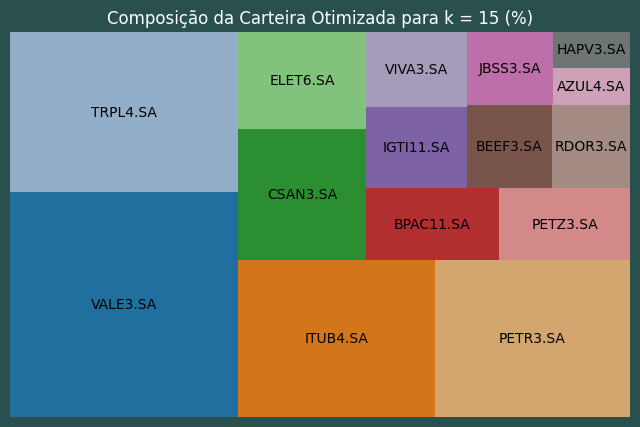

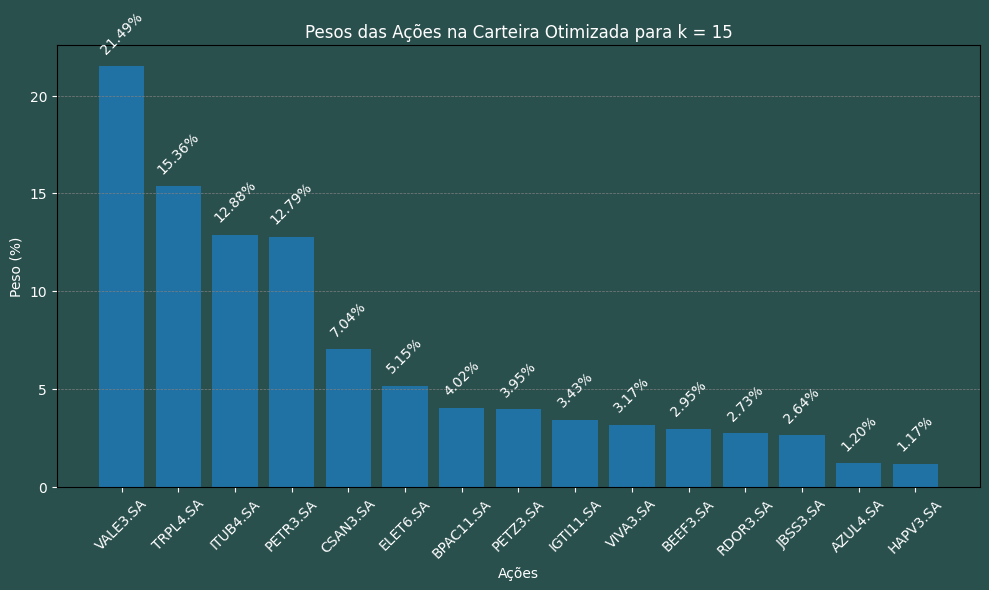

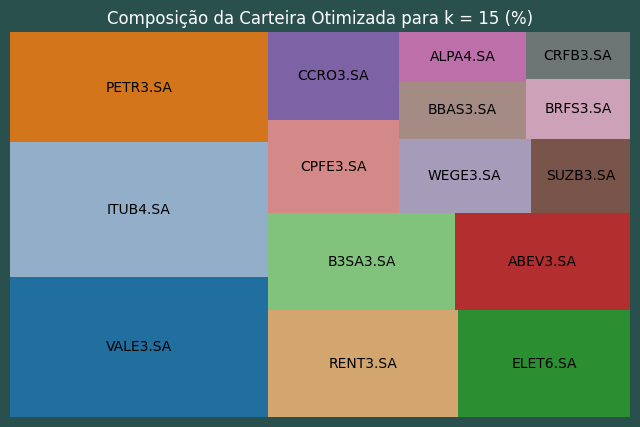

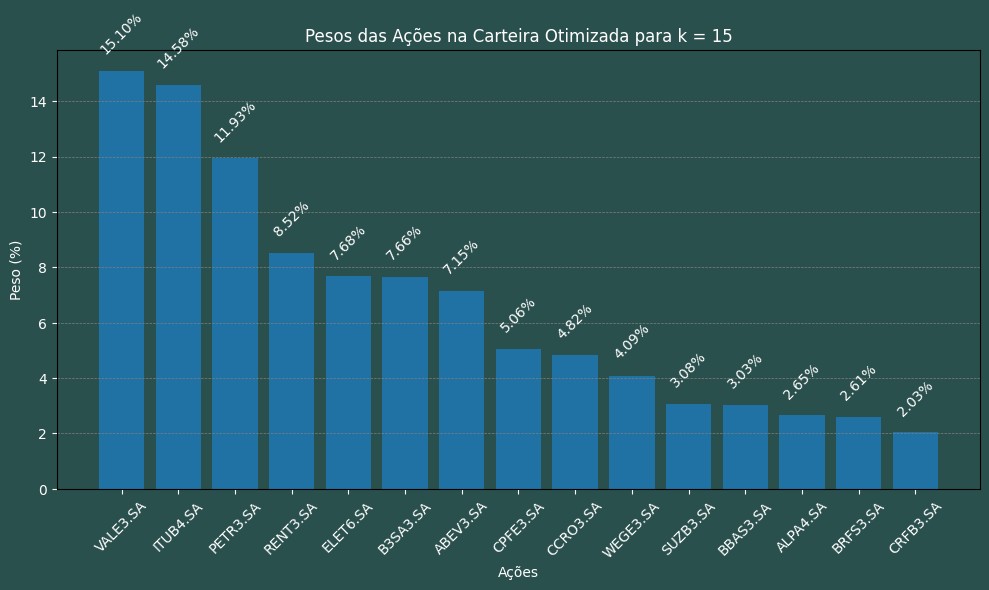

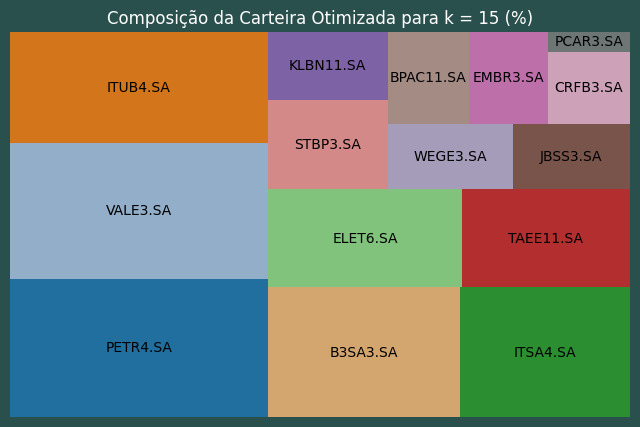

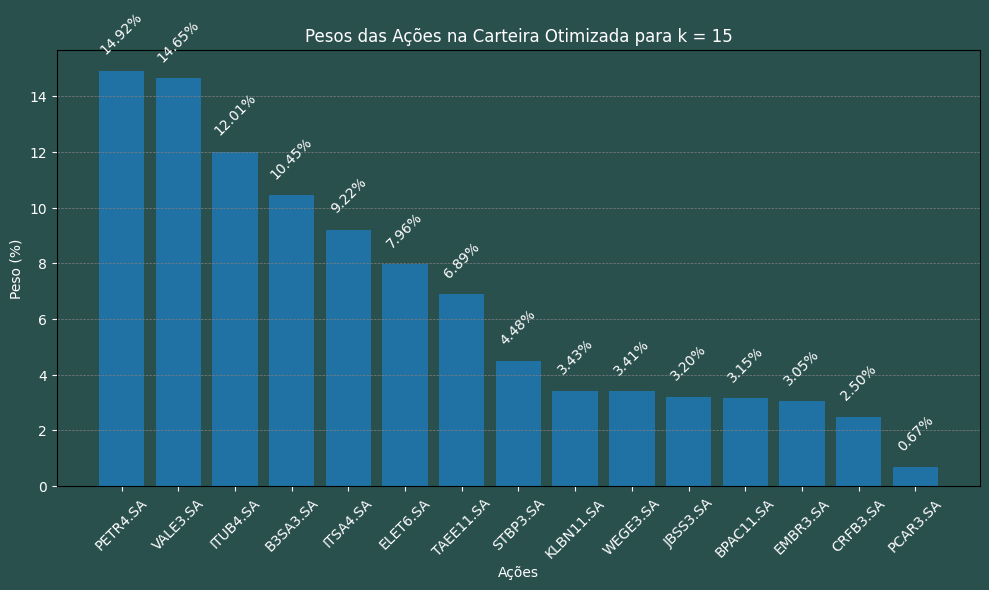


Processing cumulative portfolio returns for K=15...


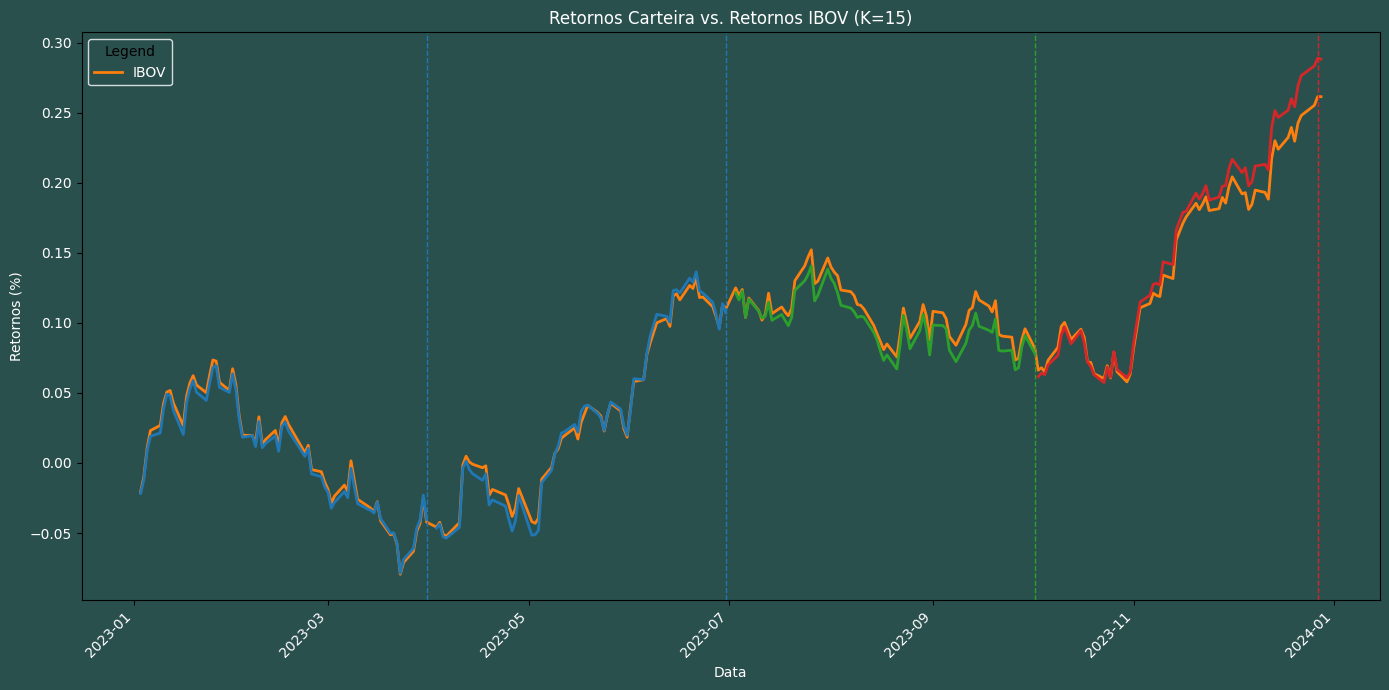

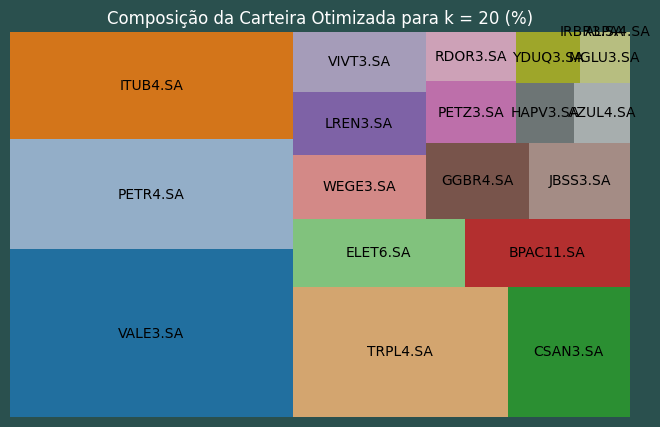

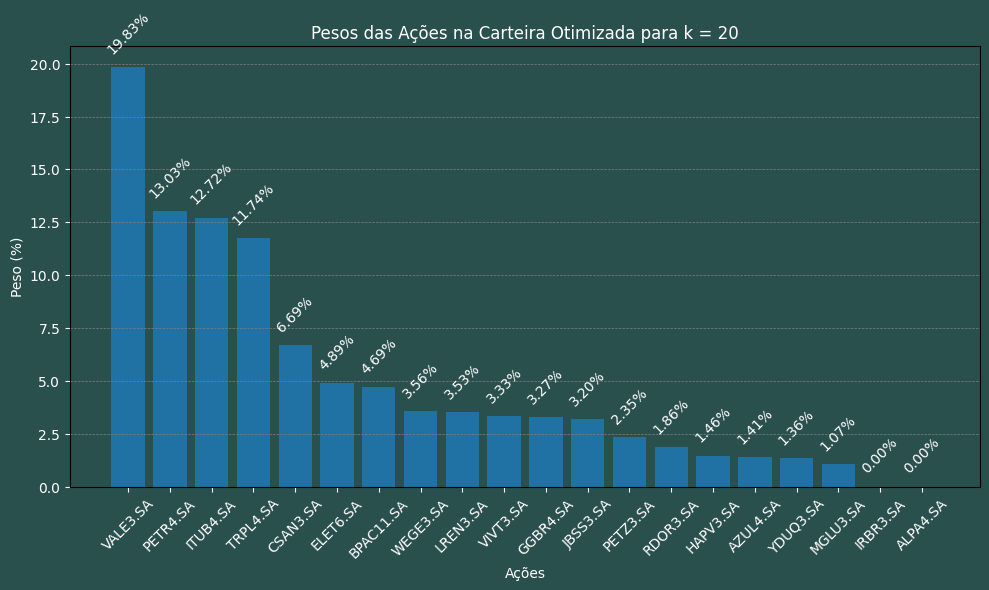

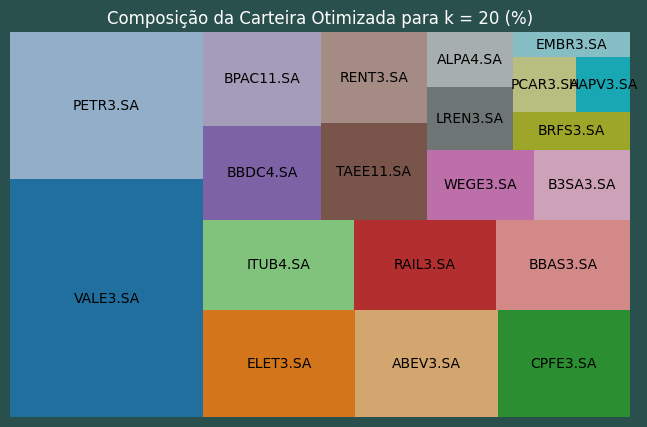

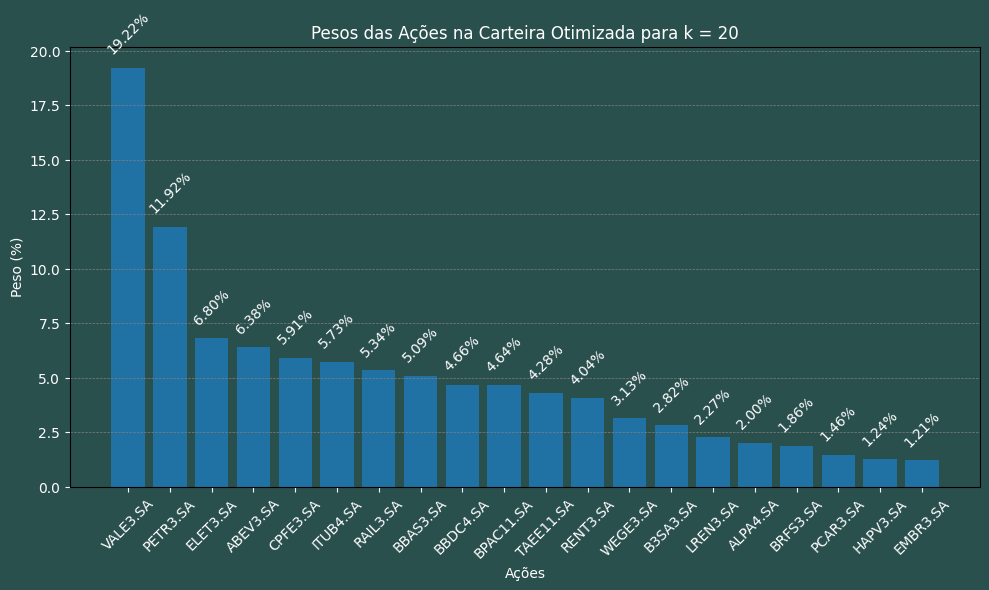

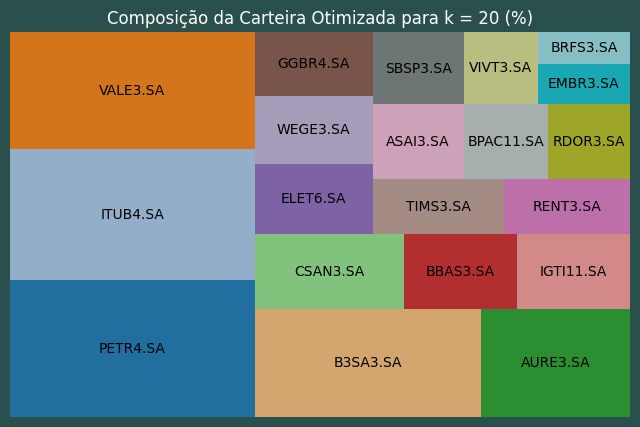

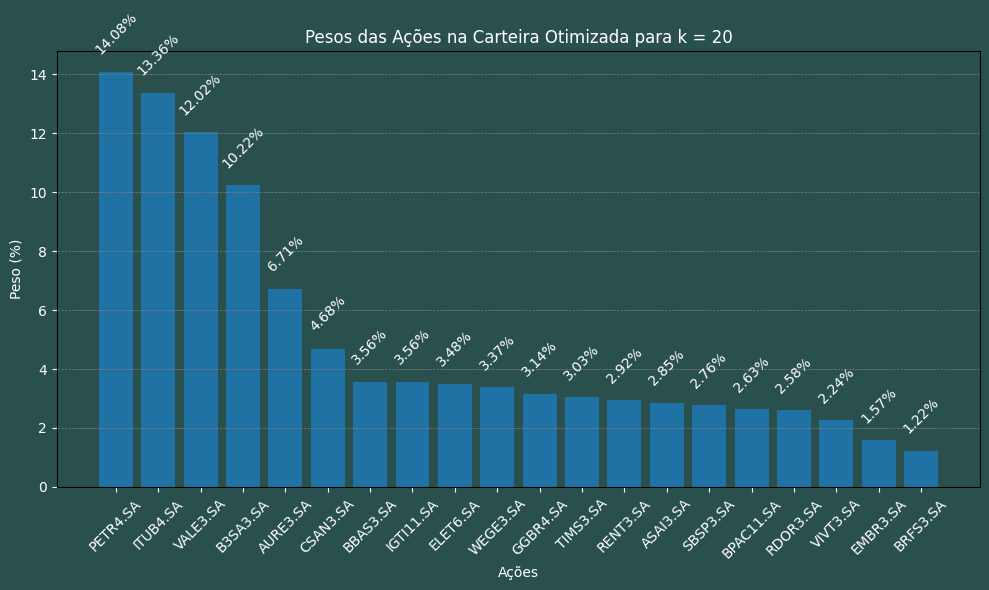


Processing cumulative portfolio returns for K=20...


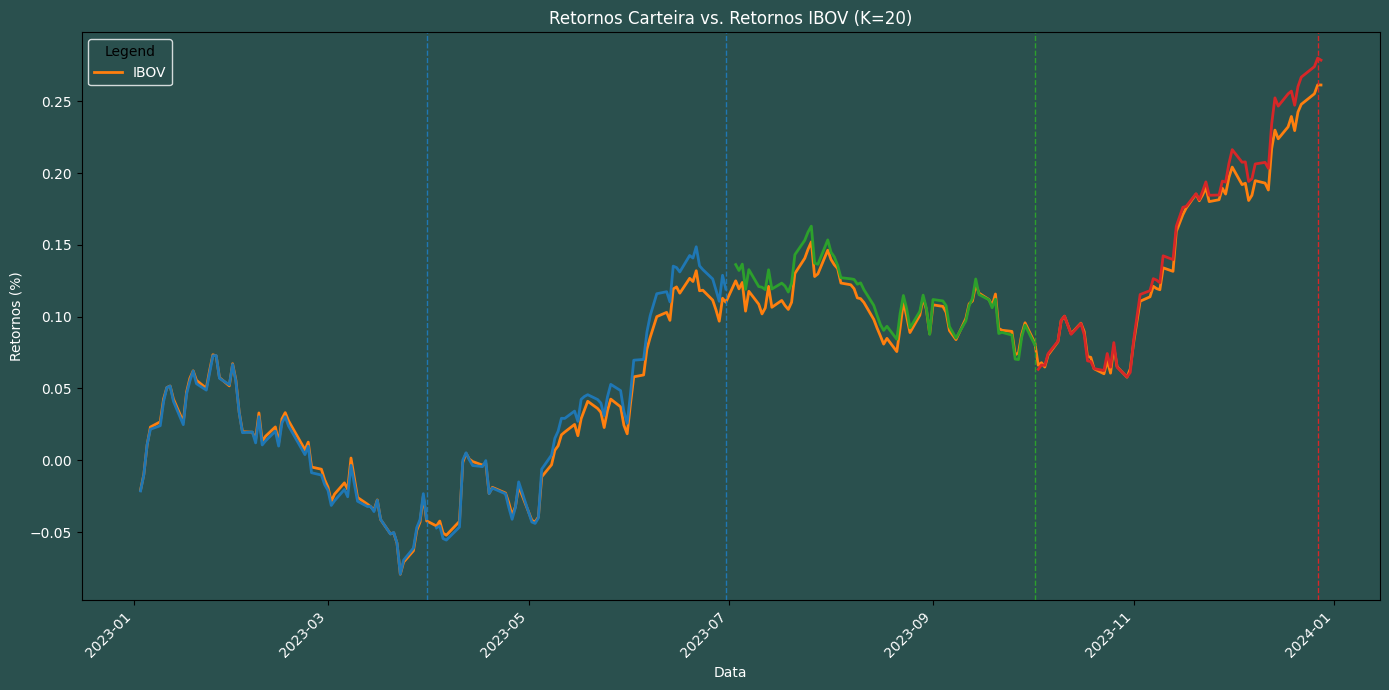

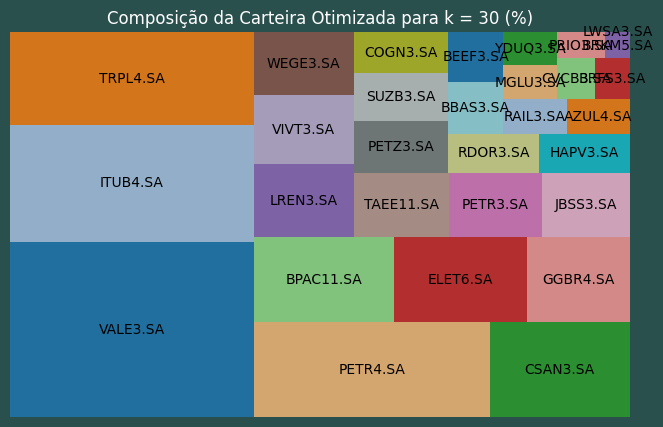

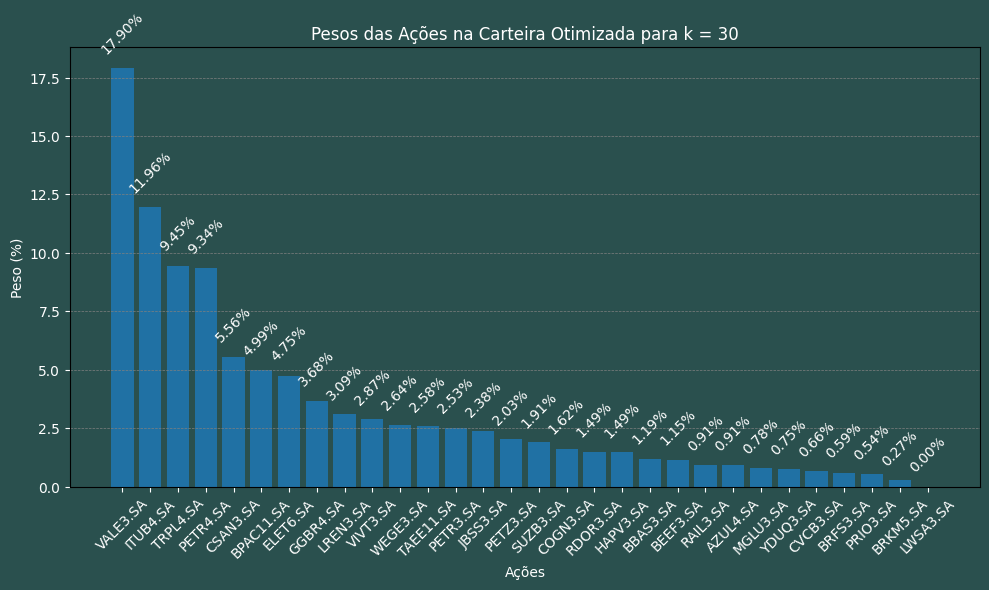

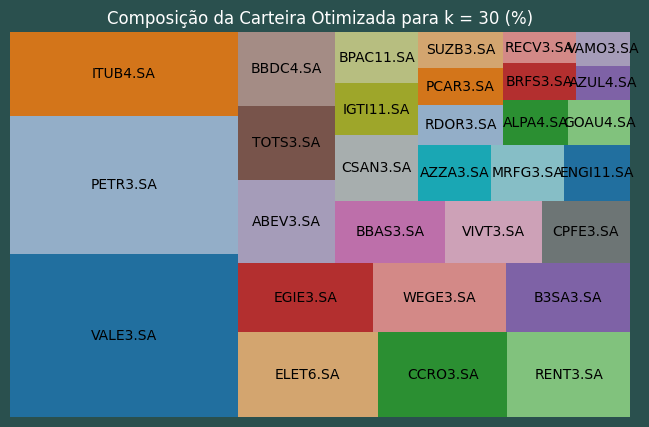

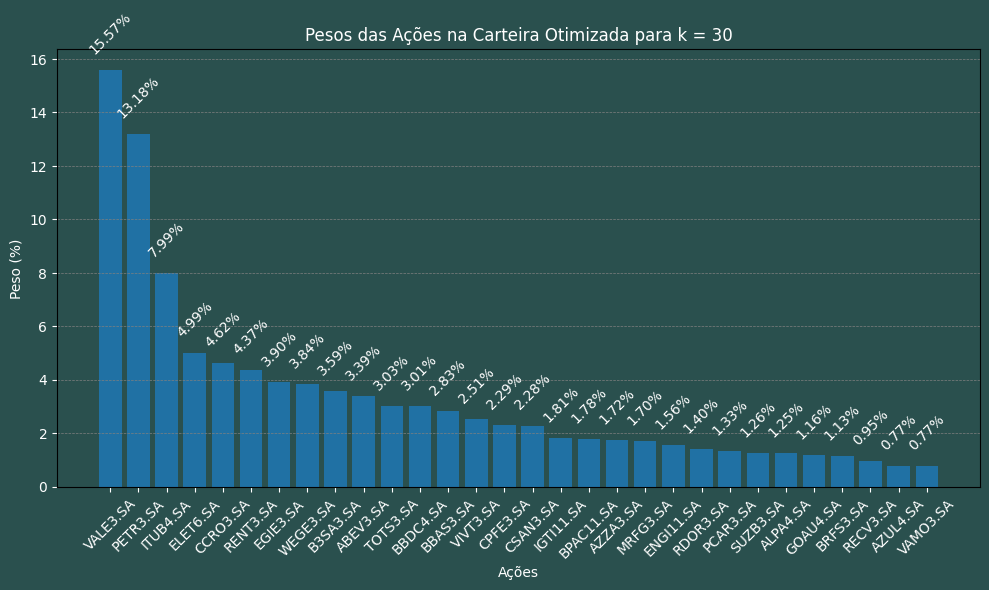

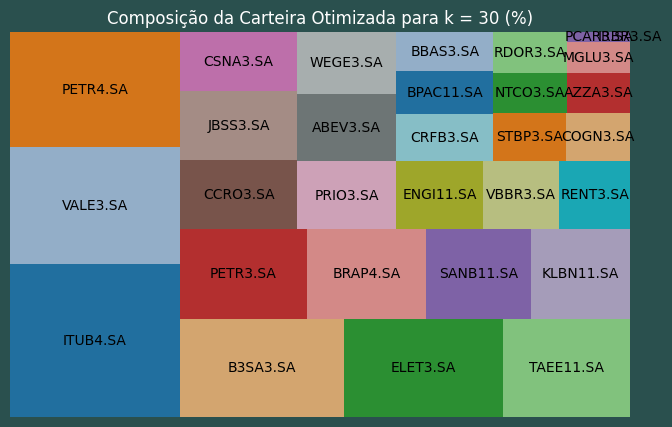

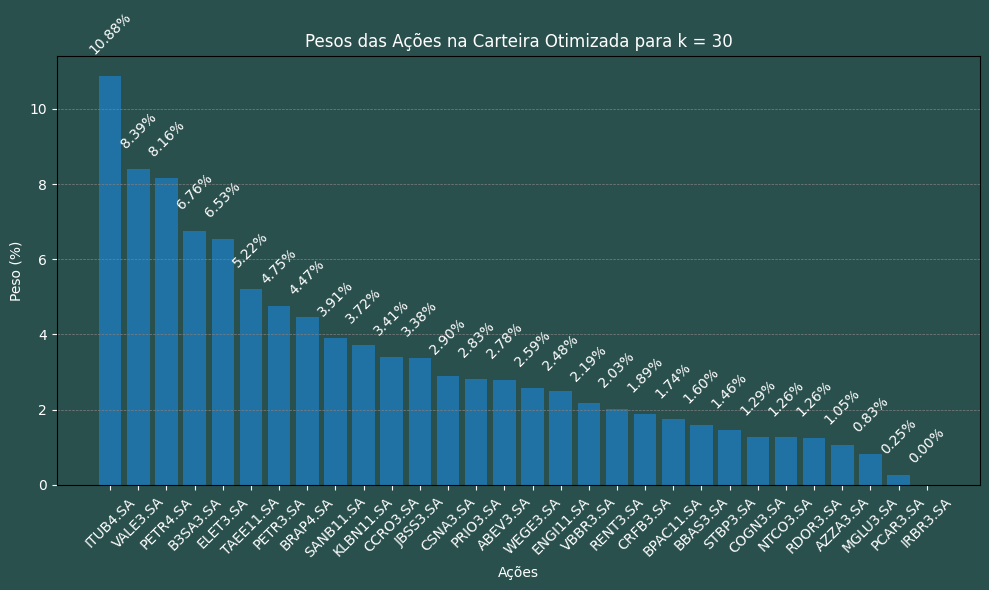


Processing cumulative portfolio returns for K=30...


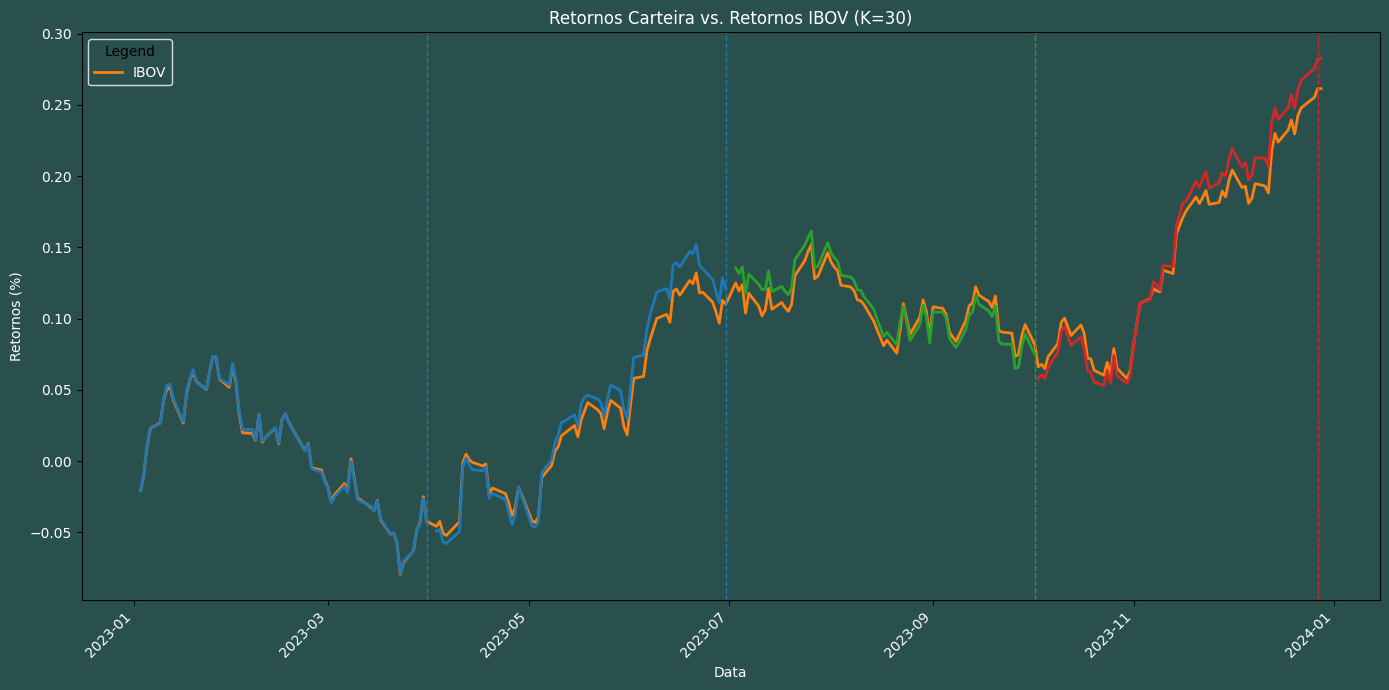

In [ ]:
import matplotlib.ticker as ticker
from matplotlib.colors import to_rgba

for k, all_weights in all_weights_dict_b3.items():
    for period in all_weights['Period'].unique():
        period_weights = all_weights[all_weights['Period'] == period]

        selected_stocks = period_weights['Stock']
        weights = period_weights['Weight']

        plot_portfolio_composition(selected_stocks, weights, k)

    # Cumulative % returns
    portfolio_returns, returns_index = compute_portfolio_returns_cum(k, all_weights, returns_data_ex2_pct_change)

    fig, ax = plt.subplots(figsize=(14, 7))
    fig.patch.set_facecolor('#2A504E')
    ax.set_facecolor('#2A504E')

    ax.plot(returns_index.index, returns_index['^BVSP'], label='IBOV', linewidth=2, color='tab:orange')

    plot_with_periodic_colors(ax, portfolio_returns.index, portfolio_returns, 3, ['tab:blue', 'tab:blue', 'tab:green', 'tab:red', 'tab:red'])

    ax.set_title(f'Retornos Carteira vs. Retornos IBOV (K={k})', color='white')
    ax.set_xlabel('Data', color='white')
    ax.set_ylabel('Retornos (%)', color='white')
    plt.xticks(color='white')
    plt.yticks(color='white')
    ax.legend(title='Legend', facecolor='#2A504E', labelcolor='white', edgecolor='white', loc='best', frameon=True)

    plt.xticks(rotation=45, ha='right', color='white')
    plt.yticks(color='white')

    plt.tight_layout()
    plt.show()

#### Métricas


Processing portfolio returns for K=15...

Processing portfolio returns for K=20...

Processing portfolio returns for K=30...


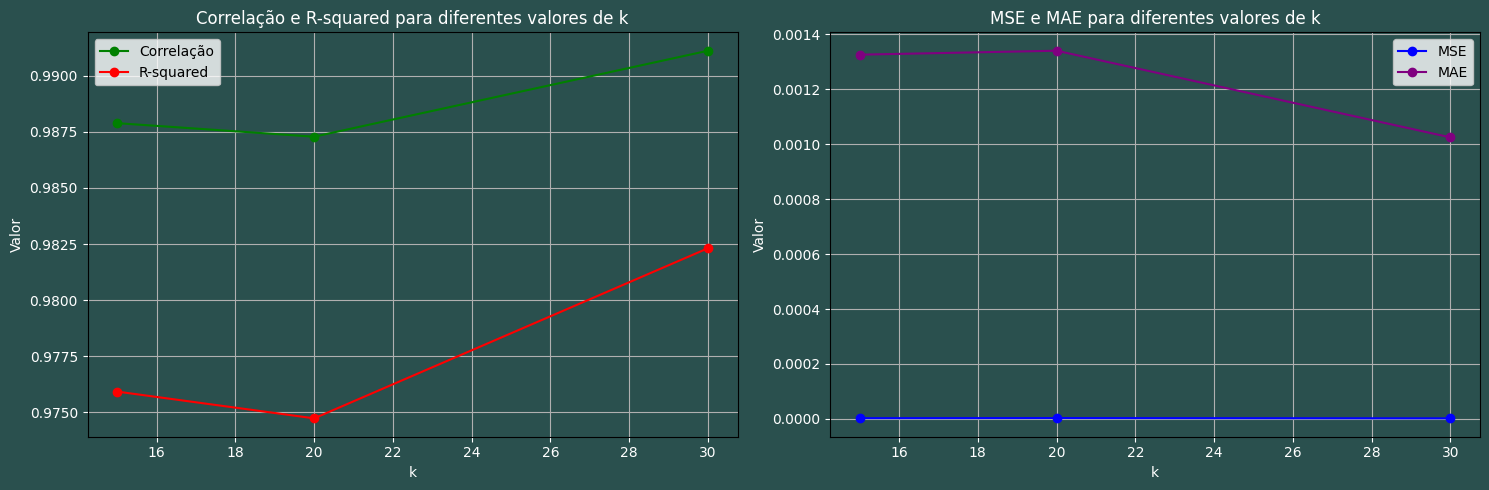

In [ ]:
mae_list = []
mse_list = []
correlation_list = []
r_squared_list = []
n_k = []

for k, all_weights in all_weights_dict_b3.items():
    portfolio_returns, returns_index = compute_portfolio_returns(k, all_weights, returns_data_ex2_pct_change)

    mse, mae, correlation, r_squared = compute_metrics(portfolio_returns, returns_index)

    mae_list.append(mae)
    mse_list.append(mse)
    correlation_list.append(correlation)
    r_squared_list.append(r_squared)
    n_k.append(k)

plot_metrics(correlation_list, r_squared_list, mse_list, mae_list, n_k)